# 第3课：数据可视化

> 授课教师： [Yuki Oyama](mailto:y.oyama@lrcs.ac), [Prprnya](mailto:prprnya@lrcs.ac)
>
> 克里斯蒂安·弗雷德里希·魏希曼化学系, 拉斯托利亚皇家理学院

本材料采用<a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.zh-hans">知识共享 署名-非商业性使用-相同方式共享 4.0</a> 许可协议授权<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/nc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">

在这节课中，我们将会学习用**Matplotlib**来可视化数据，它是一个强大的Python库，可以用来在Python中创造静态的、动态的以及可交互的可视化图表。

在开始前，让我们再次导入一下`numpy`吧~

```python
import numpy as np
```

In [9]:
import numpy as np

## 迈出你使用Matplotlib的第一步!

现在，我们来导入`matplotlib`库。我们将会从`matplotlib`中调用`pyplot`模块，即`matplotlib.pyplot`。和`numpy`一样，我们可以为它取一个简短的别名：

```python
import matplotlib.pyplot as plt
```

In [10]:
import matplotlib.pyplot as plt


准备好了吗孩子们？ <span style="color:gray">是的，船长！</span> 来迈出我们的第一步——两个原子之间的[Morse势](https://en.wikipedia.org/wiki/Morse_potential) 。 如果你对Morse势不太熟悉，你可以点击前面的链接，或者由我来给你一个简短的介绍。

我们都知道 （_你应该知道！_） 我们通常用简谐振子模型来描述一个化学键。在简谐振子模型中，势能的表达式如下：
$$V_\text{harmonic}(r) = \frac{1}{2} k \left( r - r_0 \right)^2$$
其中 $k$ 是弹性系数，$r_0$ 是平衡距离，  $r$ 是两原子间的距离，这个模型可以用来解释键的振动，但是在描述键的解离时，它并不是很准确。你可以看到当 $r\to\infty$ 时，势能会趋于无穷大，但这 _与现实不符_。如果两个原子被分开很远的距离，化学键就会断裂，并且势能会变为零。为了处理这种特性，Philip M. Morse提出了一种新的势能，这种势能之后以他自己的名字命名，被称为Morse势：

$$V_\text{Morse}(r) = D_e \left( 1 - e^{-a \left( r - r_0 \right)} \right)^2$$

其中$D_e$ 为解离能，$a$是弹性系数，而$r_0$是平衡距离。

我们对于谐振子势的出现都很熟悉了，但是Morse势呢？我们来看看它长啥样。首先，我们将Morse势定义为一个函数：

```python
def morse(r, De, a, r0):
    return De * (1 - np.exp(-a * (r - r0)))**2
```

In [11]:
def morse(r, De, a, r0):
    return De * (1 - np.exp(-a * (r - r0)))**2


是时候用`pyplot`了！运行下面的代码，生成一个 $\ce{H2}$ 分子中，两个氢原子之间的Morse势图像：

```python
De = 4.948  # eV
a = 1.905  # 1/Å
r0 = 0.74144  # Å

r = np.linspace(0, r0 + 2.0, 500)  # Å
V_morse = morse(r, De, a, r0)

plt.plot(r, V_morse)
plt.show()
```

(数据来源： "Spectroscopic Constants of Diatomic Molecules" in CRC Handbook of Chemistry and Physics, 106th Edition (Internet Version 2025), John R. Rumble, ed., CRC Press/Taylor & Francis, Boca Raton, FL.)

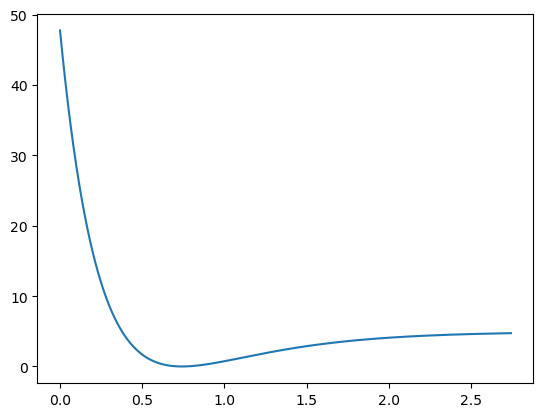

In [12]:
De = 4.948  # eV
a = 1.905  # 1/Å
r0 = 0.74144  # Å

r = np.linspace(0, r0 + 2.0, 500)  # Å
V_morse = morse(r, De, a, r0)

plt.plot(r, V_morse)
plt.show()

这里，Morse势很好地表示出了 $r\to\infty$ 时的键解离。
通常来说，要画一个2D图像，你只需要两个数组：一个用于x轴，另一个用于y轴。然后调用`plt`中的`plot`函数，给出x的数据作为第一个变量，y的数据作为第二个变量。最后，调用`show`函数来展示图像。

## 线型、标记和颜色
### 线型和线宽

在上面的图像中，`matplotlib`用的是默认的**线型**，即实线。我们可以用关键字参数`linestyle`来改变线型。举个例子，我们可以用下面的语句画虚线：

```python
plt.plot(r, V_morse, linestyle='--')
plt.show()
```

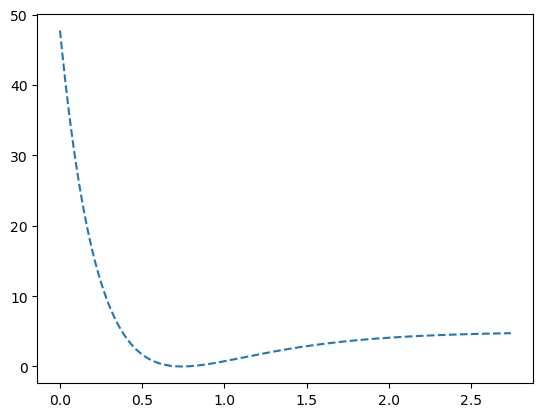

In [13]:
plt.plot(r, V_morse, linestyle='--')
plt.show()

在上述代码中，我们用了关键字参数`linestyle`来指定了线型。请确保在线型名称周围加上引号。
这里是一些常用的线型：
| 名称    | 快捷方式 |
|---------|----------|
| `solid`（实线）     | `-`      |
| `dotted`（点线）    | `:`      |
| `dashed`（虚线）  | `--`     |
| `dashdot`（点虚线）| `-.`     |

在`matplotlib`中还有更多可用的线型。你可以在[Matplotlib Documentation - Linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).中找到它们

有时我们也会想改变**线宽**。例如，我们可以用下面的语句画更粗一点的点线：
```python
plt.plot(r, V_morse, linestyle=':', linewidth=3)
plt.show()
```

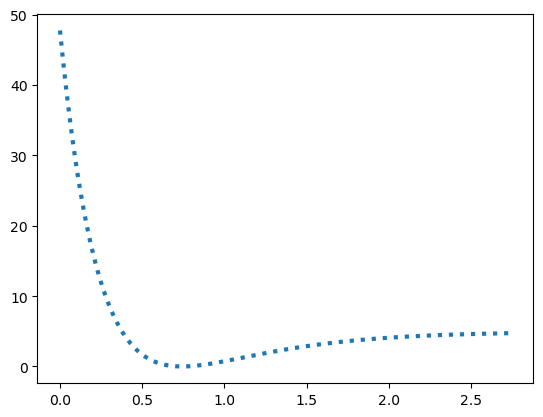

In [14]:
plt.plot(r, V_morse, linestyle=':', linewidth=3)
plt.show()

### 标记

我们在上面的图中看不到标记，这是因为我们没有指定任何**标记**。在这种情况下，`matplotlib`会将其解释为不用任何标记，但我们可以使用关键字参数`marker`来指定标记。例如，我们可以用下面的语句来使用实心圆圈：

```python
plt.plot(r, V_morse, marker='o')
plt.show()
```

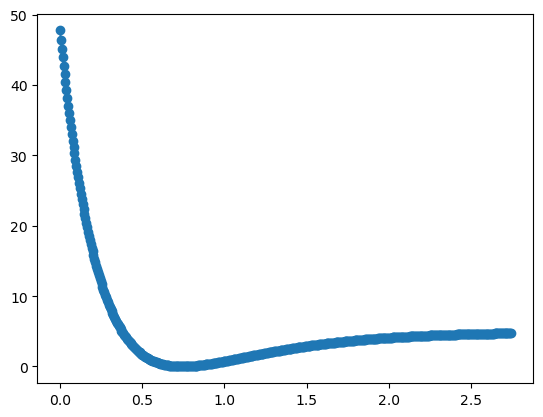

In [15]:
plt.plot(r, V_morse, marker='o')
plt.show()

等下……这看起来也太糟糕了吧！这些圆圈太密集了。这是因为我们用了很密的500个点作为步长。现在，让我们用一个更大的步长，只用50个点：

```python
plt.plot(r[::10], V_morse[::10], marker='o')
plt.show()
```

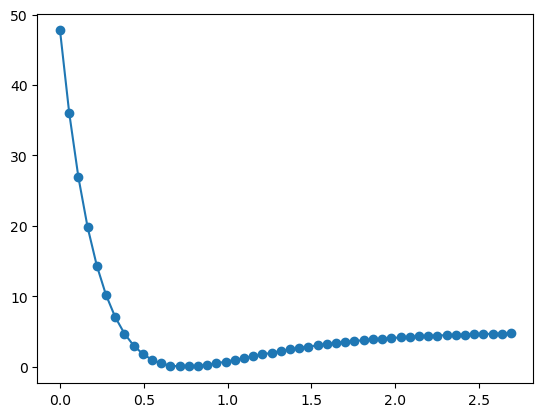

In [16]:
plt.plot(r[::10], V_morse[::10], marker='o')
plt.show()

其实我们还有另一个方法来解决这个问题，那就是通过关键字参数`markersize`（或者缩写成`ms`）来修正这些标记的尺寸。例如，我们可以通过下面的语句来使用更小的尺寸：

```python
plt.plot(r, V_morse, marker='o', markersize=2.5)
plt.show()
```

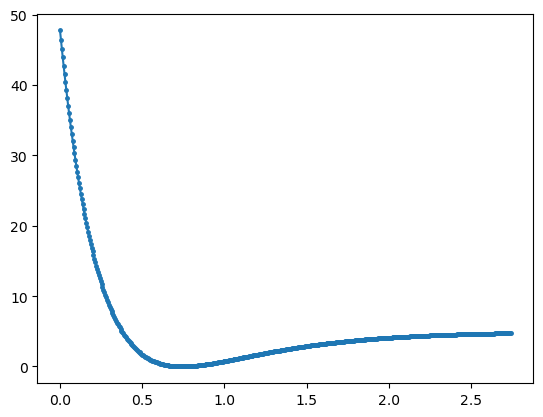

In [17]:
plt.plot(r, V_morse, marker='o', markersize=2.5)
plt.show()

好吧……这也没好到哪去，但记得，在真实情况下，步长往往受控于你的采集仪器的分辨率，而不是一个`linspace`函数，并且，如果你的数据很大而且点很接近，你就不需要给每一个点都做上标记了。直接画出线就行了！

如果你想，你也可以换成其他标记。例如，我们可以用三角形：

```python
plt.plot(r[::10], V_morse[::10], marker='^')
plt.show()
```

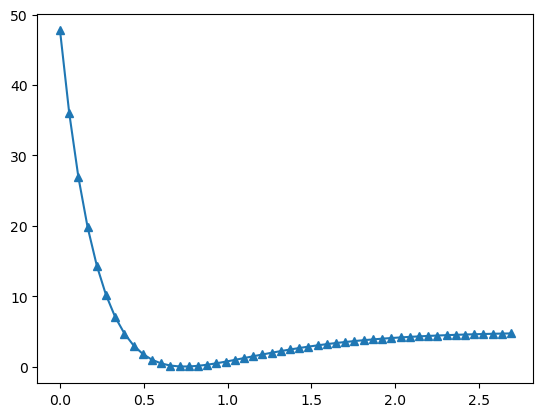

In [18]:
plt.plot(r[::10], V_morse[::10], marker='^')
plt.show()

有时我们不想用线，只想用标记。在这种情况下，我们可以用带有空字符串的关键字参数`linestyle`：

```python
plt.plot(r[::10], V_morse[::10], linestyle='', marker='^')
plt.show()
```

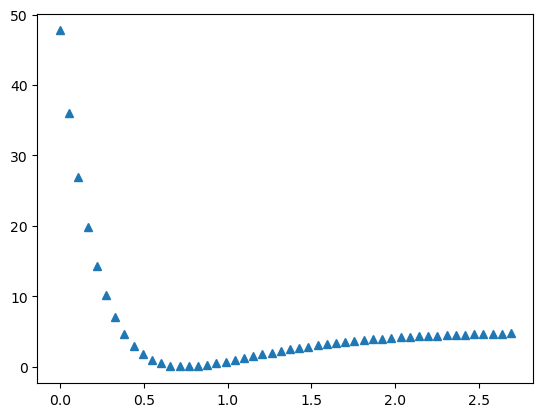

In [19]:
plt.plot(r[::10], V_morse[::10], linestyle='', marker='^')
plt.show()

反之，如果我们只想用线而不含任何标记也是同理，即，`marker=''`。

除此之外，你还可以在关键字参数`marker`中使用数学符号。试试这个：
```python
plt.plot(r[::10], V_morse[::10], linestyle='', marker=r'$\beta$')
plt.show()
```

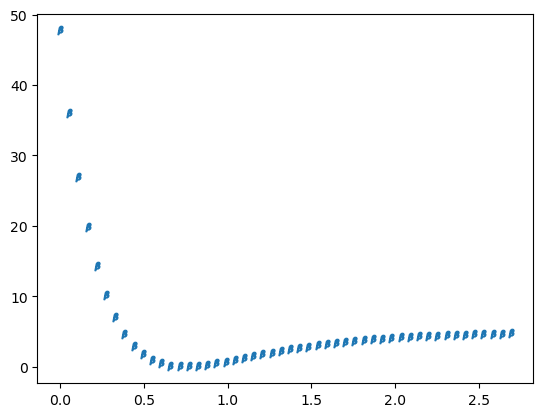

In [20]:
plt.plot(r[::10], V_morse[::10], linestyle='', marker=r'$\beta$')
plt.show()

确保在包含着美元符号的引号前加上`r`！否则，它不会给出你想要的结果。

想找更多的标记，你可以查看 [Matplotlib Documentation - Marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html).

### 颜色

在上图中，我们用了默认**颜色**，即蓝色。我们可以用关键字参数`color`（缩写为`c`）来改变颜色。例如，我们用下面的语句来使用红色：

```python
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color='red')
plt.show()
```

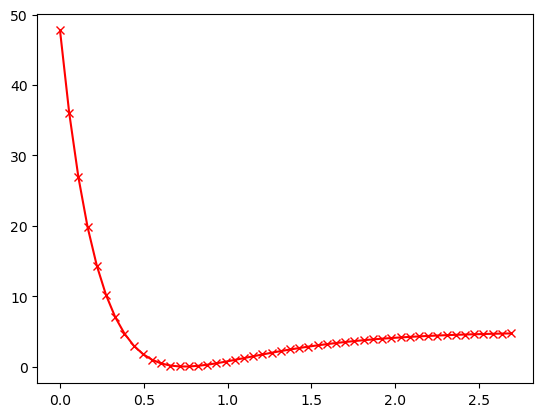

In [21]:
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color='red')
plt.show()

在上述代码中，我们用了关键词参量`color`来指定颜色。请确保颜色名称周围加上引号。通常，`matplotlib`中还有许多可用的颜色。显然，`green`和`yellow`会分别画出绿色和黄色的图像。你甚至可以用RGB色号或者十六进制色号。例如，我们可以通过RGB色号`(0, 0.5, 0)`来使用绿色：
```python
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color=(0, 0.5, 0))
plt.show()
```

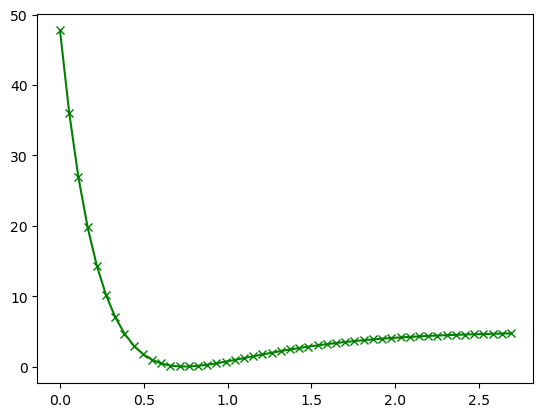

In [22]:
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color=(0, 0.5, 0))
plt.show()

注意到RGB色号是扩在括号中的一个序列(R, G, B)，<u>范围是从0到1</u>。
我们再来试试用Yu的主题色~ 颜色是`#98caec`：
```python
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color='#98caec')
plt.show()
```

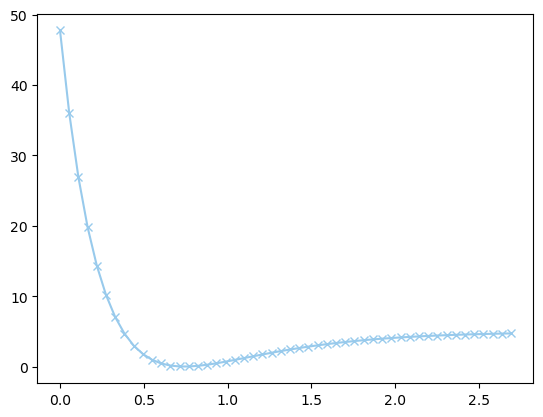

In [23]:
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color='#98caec')
plt.show()

这是一个十六进制色号。你需要以`#`作为开头，接着使用六位十六进制数码。同样地，记得要在色号前后加上引号。

如果我们想在线和标记上用不同的颜色该怎么办呢？或者如果我们想在标记的边框和填充上用不同的颜色该怎么办呢？想做到这些事情，我们可以使用关键字参量`markerfacecolor`（缩写为`mfc`）和`markeredgecolor`（缩写为`mec`）。例如，我们可以用下面的语句画出蓝色的线，同时用带黑框的金色标记。
```python
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='o', color='blue', mfc='gold', mec='black')
plt.show()
```

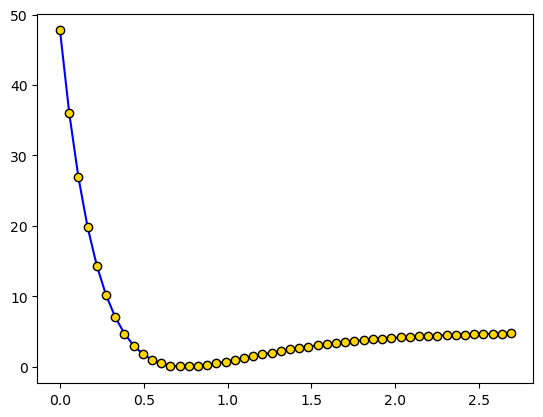

In [24]:
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='o', color='blue', mfc='gold', mec='black')
plt.show()

想寻找更多的颜色和用法，你可以查看 [Matplotlib Documentation - Color reference](https://matplotlib.org/stable/gallery/color/named_colors.html) 和 [Matplotlib Documentation - Specifying colors](https://matplotlib.org/stable/users/explain/colors/colors.html).

<u>不确定怎么选颜色？ 试试 [Adobe Color](https://color.adobe.com/create/color-wheel)—一个免费的在线工具，它可以方便地探索调色盘、发现更多美妙的组合。</u>

<span style="color:green">**练习**:</span> 假如我们想绘制另一种常见的势能 [Lennard-Jones 势](https://en.wikipedia.org/wiki/Lennard-Jones_potential), 也被称作 L-J 势 or 12-6 势, 这是一种描述分子间相互作用的简单势能。 该势能的表达式如下:
$$V_\text{LJ} = 4\varepsilon \left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6}\right]$$
其中 $\varepsilon$ 是势阱的深度, $\sigma$ 是势能为零时的距离,  $r$ 是两分子之间的距离。

定义一个函数 `LJ(r, sigma, epsilon)` 它包含 $r$, $\sigma$, 和 $\varepsilon$ 作为参数并且返回L-J势的值。 画出 $\ce{H2}$分子在范围 $r \in [2.5, 10]\,\mathrm{Å}$内的L-J势图像 . 可用数据 $\sigma = 2.81\,\mathrm{Å}$ 以及 $\varepsilon = 3.40 \times 10^{-3}\,\mathrm{eV}$ (数据来源为 [_J. Mol. Struct._ **2014**, 068, 164–169](https://doi.org/10.1016/j.molstruc.2014.04.006)). 请你用黄色虚线以及30个红框圆形标记（填充一个你最喜欢的颜色！）画出这个图像。

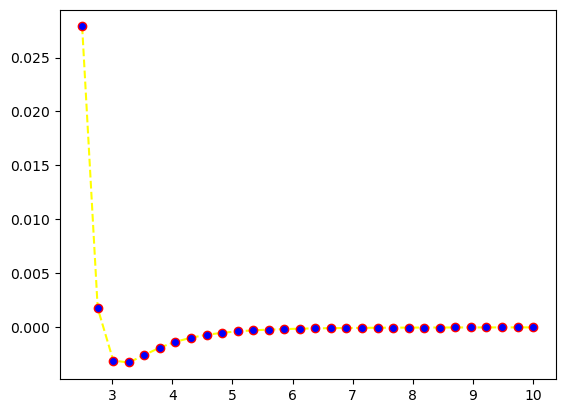

In [25]:
def LJ(r, sigma, epsilon):
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

r = np.linspace(2.5, 10, 30)
sigma = 2.81
epsilon = 3.40 * 10**(-3)

V_LJ = LJ(r, sigma, epsilon)

plt.plot(r, V_LJ, linestyle='--', color='yellow', marker='o', mfc='blue', mec='red')

plt.show()

## 坐标轴区域和子图

目前，我们学习了怎么用线和标记来绘制简单的图像，以及怎么调整它们的观感，但是如果我们想要进阶一点，画出信息量更大的图像——包括标题、坐标轴标签、图例、自定义刻度甚至多重坐标轴，我们应该怎么办呢？这些事可以通过`axes`模块以子图的形式实现。但是，我们不会直接调用`axes`模块，而是从`plt`中调用函数来实现我们的目标。

<img src="./assets/anatomy.png" alt="Anatomy of a Figure" width="50%" style="display=block; margin:auto"/>

> 图片来源: [Matplotlib documentation](https://matplotlib.org/stable/users/explain/quick_start.html#parts-of-a-figure)

### 标题和图例

不过，在深入探讨之前，我们先搁置一下Morse势的事情。别担心——我们之后还会回到这个话题。至于现在，让我们换换口味，来画一个经典的函数：$\sin x$，鉴于这个函数可以更好地解释我们的概念。
```python
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()
```

In [29]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

我们可以使用`title`和`legend`函数来在我们的图像上添加**标题**和**图例**。例如，我们可以调用`plt.title()`来在图像上加一个标题，并且将标题作为字符串传入：
```python
plt.plot(x, y)
plt.title('Plot of $\sin x$')
plt.show()
```

In [30]:
plt.plot(x, y)
plt.title('Plot of $\sin x$')
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

注意到标题中的 $\sin x$是以LaTeX字符串的形式展示的，但它是 _无衬线_ 字体。要使用一个 _衬线_ 字体，你可以通过这些设置在 `matplotlib`中启用LaTeX渲染。
```python
plt.rcParams['text.usetex'] = True
```

（在LaTeX中渲染需要完整地[安装Latex](https://www.latex-project.org/get/);如果你不知道怎么安装它，那就暂时跳过这一块；不然由于缺少LaTeX环境，你会看到一个error。）尝试下面的代码：
```python
plt.rcParams['text.usetex'] = True
plt.plot(x, y)
plt.title('Plot of $\sin x$')
plt.show()
```

In [ ]:
plt.rcParams['text.usetex'] = True
plt.plot(x, y)
plt.title('Plot of $\sin x$')
plt.show()

你应该注意到了完整的LaTeX渲染很慢。有一些优化的方法，但是现在我们先继续。（我们之后还会回到这里的！）
同样，别忘了在你画完上一张图之后，将`plt.rcParams`设回它的初始值（`False`）。
```python
plt.rcParams['text.usetex'] = False
```

In [32]:
plt.rcParams['text.usetex'] = False

我们也可以通过调用`plt.legend()`来在图像上添加图例。为了使用它，我们需要调用带有`label`关键字参数的`plt.plot`来为线条添加标签。也就是说，将`label='$\sin x$'` 作为`plot`函数中的一个参数。然后你就可以调用`plt.legend()`并且将标签以字符串<u>列表</u>的形式传入函数中：

```python
plt.plot(x, y, label='$\sin x$')
plt.title('Plot of $\sin x$')
plt.legend(['$\sin x$'])
plt.show()
```

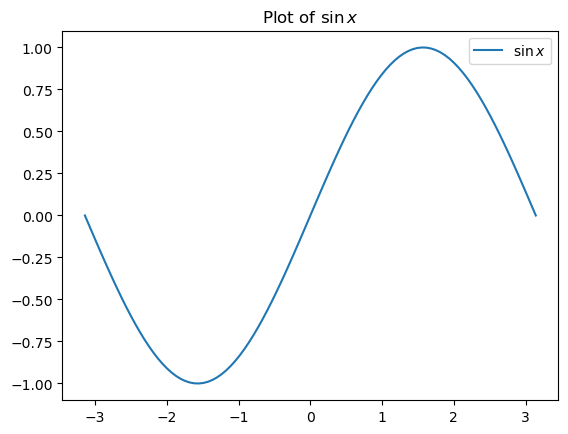

In [33]:
plt.plot(x, y, label='$\sin x$')
plt.title('Plot of $\sin x$')
plt.legend(['$\sin x$'])
plt.show()

你可以看到图例出现在了图像右上角的小方框里，显示着你在`plot`函数中指定的标签。图例的位置可以用关键字参数`loc`来自定义。例如，如果想把图例放在左上角，你可以这么写：
```python
plt.plot(x, y, label='$\sin x$')
plt.title('Plot of $\sin x$')
plt.legend(['$\sin x$'], loc='upper left')
plt.show()
```

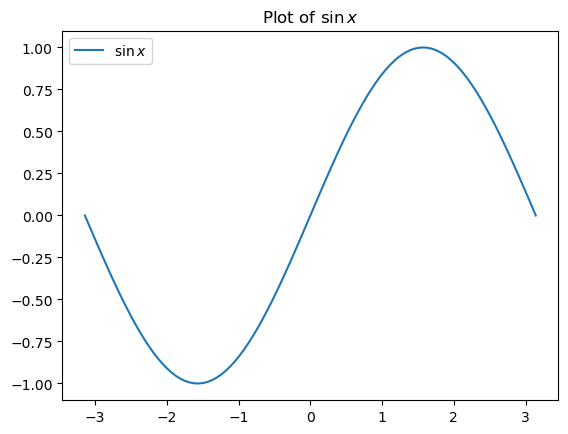

In [34]:
plt.plot(x, y, label='$\sin x$')
plt.title('Plot of $\sin x$')
plt.legend(['$\sin x$'], loc='upper left')
plt.show()

`loc`参数可以接受像`upper left`,`lower right`,`center`等描述性字符串。这让你可以灵活地把图例放在最合适的位置。如果想查看所有可用选项，你可以查看[Matplotlib Documentation - Legends](https://matplotlib.org/stable/users/explain/axes/legend_guide.html).


### 坐标轴、刻度与比例尺

自定义坐标轴的操作十分简单直观。你可以使用`plt.xlabel()`和`plt.ylabel()`分别为$x$轴和$y$轴添加标签。例如，绘制一张带有规范坐标轴标签的$\sin x$图像，需要这样：

```python
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.show()
```

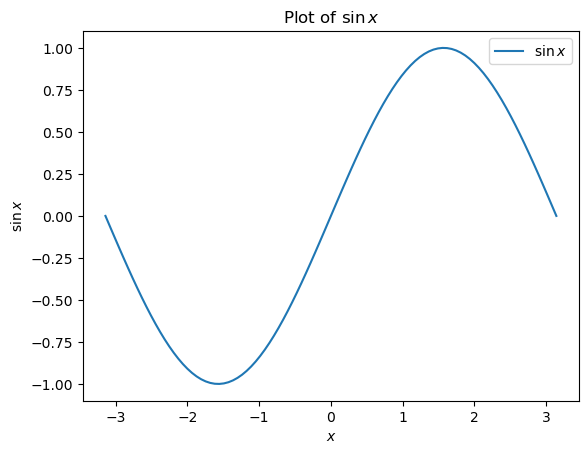

In [35]:
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.show()

有时，默认的坐标轴**刻度**标记并非解读数据的最佳选择。例如对于三角函数而言，将$x$轴以弧度（$-\pi. -\frac{\pi}{2}, 0, \frac{\pi}{2}, \pi$）为单位标注，往往比用十进制数字标注更清晰易懂。我们可在绘图后通过`plt.xticks()`轻松实现这一操作：
```python
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# 将x轴范围设置为-pi至pi，刻度以pi/2的整数倍及0进行标注

plt.xticks(
    [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    [r'$-\pi$', r'$-\frac{\pi}{2}$', '$0$', r'$\frac{\pi}{2}$', r'$\pi$']
)

plt.show()
```

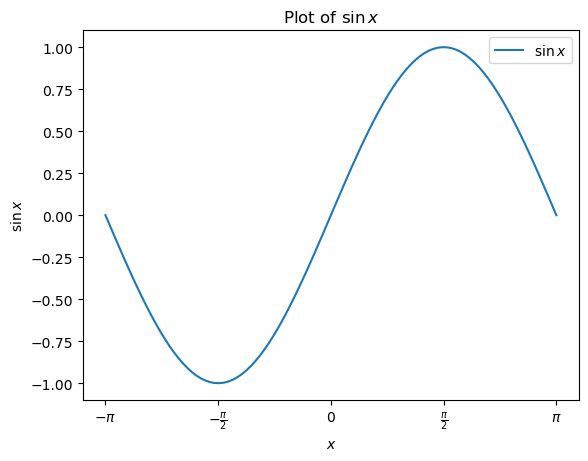

In [ ]:
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# 将x轴范围设置为-pi至pi，刻度以pi/2的整数倍及0进行标注
plt.xticks(
    [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    [r'$-\pi$', r'$-\frac{\pi}{2}$', '$0$', r'$\frac{\pi}{2}$', r'$\pi$']
)

plt.show()

这里的 `plt.xticks()` 函数接收两个参数：一个是刻度位置列表（数值型），另一个是对应的刻度标签列表（字符串或LaTeX格式）。这一功能让我们能将默认的十进制刻度替换为更具实际意义的数值——比如 $\pi$ 的整数倍，这也是绘制 $\sin x$ 图像时最自然的比例尺。在下面的例子中，我们将 $x$ 轴的取值范围设定为从 $-\pi$ 到 $\pi$，并每隔 $\pi/2$ 设置一个刻度：




```python
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# 使用 np.arange() 将x轴刻度设置为从 -π 到 π，步长为 π/2
# 注意：我们在取值范围的末尾加了0.1，因为我们想要包含最后一个刻度值
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))

plt.show()
```

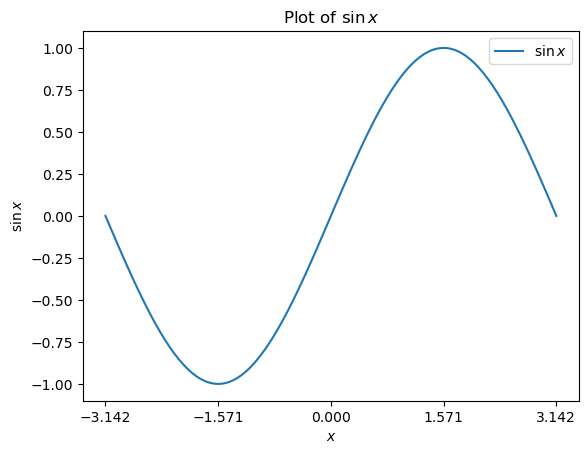

In [ ]:
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# 使用 np.arange() 将x轴刻度设置为从 -π 到 π，步长为 π/2
# 注意：我们在取值范围的末尾加了0.1，因为我们想要包含最后一个刻度值
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))

plt.show()

不过这种方法只会显示数值，无法呈现我们在数学场景中更常用的、格式美观的 $\pi$ 分数倍形式。同理，你也可以使用 `plt.yticks()` 来自定义 $y$ 轴的刻度标签。这部分内容我留给你作为练习。


除了带有标签的**主刻度**之外，还有一类**次刻度**——它们用于标记坐标轴上的中间位置，但通常不附带标签。Matplotlib 默认会隐藏次刻度，不过当我们需要坐标轴比例尺有更精细的参考刻度时，就可以将其显示出来。显示次刻度最简单的方法，是在 `plt.xticks()` 或 `plt.yticks()` 中设置 `minor=True` 参数来启用它。例如，要为 $x$ 轴添加次刻度，你可以这么写：




```python
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# 在 π/2 的整数倍位置添加主刻度
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))

# 在 π/8 的整数倍位置添加次刻度
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.show()
```

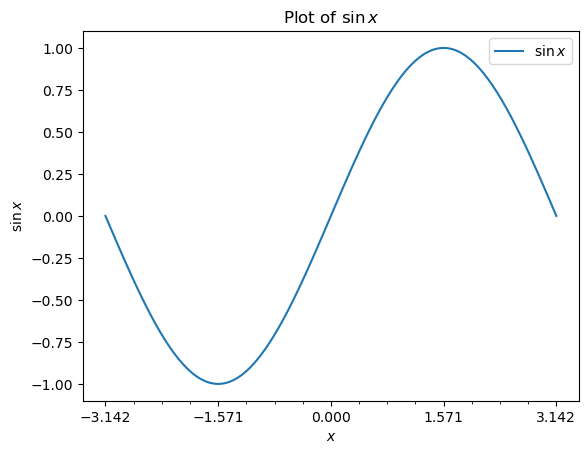

In [ ]:
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# 在 π/2 的整数倍位置添加次刻度
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))

# 在 π/8 的整数倍位置添加次刻度
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.show()

你可能已经注意到，matplotlib 会根据我们的数据自动确定坐标轴的**取值范围**。这通常效果很好，但有时我们需要放大或缩小视图来突出某些特征。在这些情况下，我们可以手动设置 $x$ 轴和 $y$ 轴的可视范围。例如，我们可能希望绘制一个函数图像，其中 $x$ 的取值范围为 $[0, 100]$，$y$ 的取值范围为 $[-1, 1]$。我们可以通过 `plt.axis()` 函数实现这一操作。比如，可以用以下代码绘制取值范围为 $x \in [0, 100]$、$y \in [-1, 1]$ 的函数 $\sin x$ 图像：

```python
x2 = np.linspace(0, 100, 1000)
y2 = np.sin(x2)

plt.plot(x2, y2, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()
# 将x轴范围设为0到100，y轴范围设为-1到1；plt.axis([xmin, xmax, ymin, ymax])
plt.axis([0, 100, -1, 1])

plt.show()
```

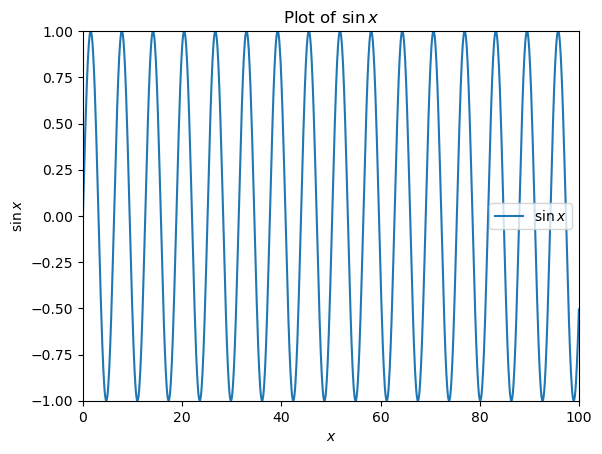

In [ ]:
x2 = np.linspace(0, 100, 1000)
y2 = np.sin(x2)

plt.plot(x2, y2, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# 将x轴范围设为0到100，y轴范围设为-1到1；plt.axis([xmin, xmax, ymin, ymax])
plt.axis([0, 100, -1, 1])

plt.show()

如果只想调整 $x$ 轴或 $y$ 轴的范围，我们可以使用 `plt.xlim()` 和 `plt.ylim()` 这两个函数。另一根坐标轴的范围会由程序自动确定。例如，要绘制 $x$ 取值范围为 $[0, \pi]$ 的函数 $\sin x$ 图像，可通过以下方式实现：

```python
plt.plot(x2, y2, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# 将x轴范围设为0到π
plt.xlim([0, np.pi])

plt.show()
```

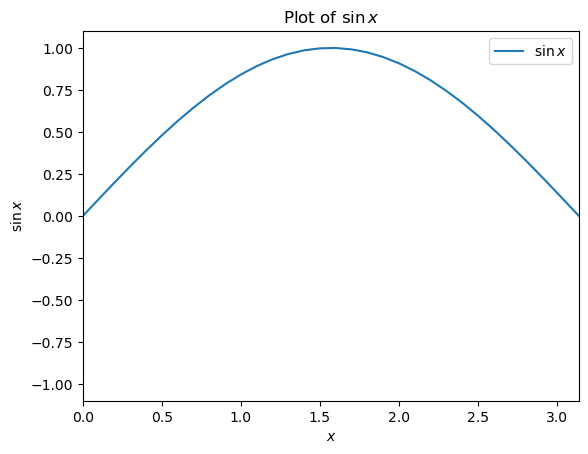

In [ ]:
plt.plot(x2, y2, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# 将x轴范围设为0到π
plt.xlim([0, np.pi])

plt.show()

到目前为止，我们在绘图时，两个坐标轴一直采用默认的**线性比例尺**。但如果我们的数据跨越多个数量级，或者呈现指数或幂律趋势，那该怎么办呢？在这些情况下，线性坐标轴可能会让一些重要特征几乎无法被观察到。Matplotlib 允许我们通过 `plt.xscale()` 和 `plt.yscale()` 函数，非常便捷地更改坐标轴的比例尺。例如，我们可以绘制一个指数函数，并观察它在不同比例尺下的呈现效果：
```python
x3 = np.linspace(0.1, 10, 400)
y3 = np.exp(x3)

plt.plot(x3, y3, label='$e^x$')
plt.xlabel('$x$')
plt.ylabel('$e^x$')

plt.title('Plot of $e^x$ for $y$-Axis in Logarithmic Scale')
plt.legend()

# 将y轴换为对数比例尺
plt.yscale('log')

plt.show()
```

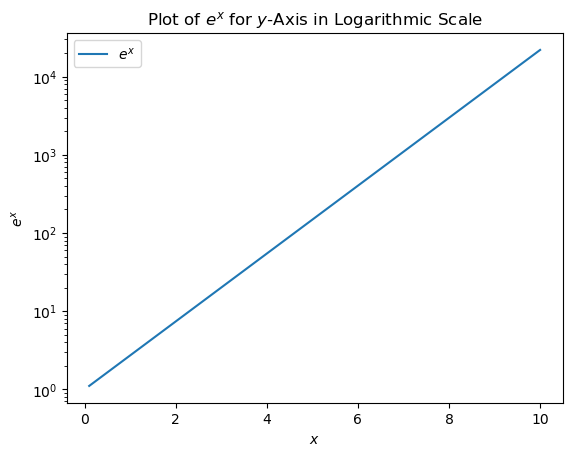

In [ ]:
x3 = np.linspace(0.1, 10, 400)
y3 = np.exp(x3)

plt.plot(x3, y3, label='$e^x$')
plt.xlabel('$x$')
plt.ylabel('$e^x$')

plt.title('Plot of $e^x$ for $y$-Axis in Logarithmic Scale')
plt.legend()

# 将y轴换为对数比例尺
plt.yscale('log')

plt.show()

我们可以看到，指数函数在**对数**比例尺上绘制时会呈现为一条直线。当我们希望从指数型数据中还原出线性关系时，这种处理方式非常实用。再来看另一个例子：叔丁基溴的一级水解反应:

$$\ce{(CH3)3CBr + NaOH -> (CH3)3COH + NaBr}$$

该反应的速率方程为：

$$\text{rate} = -\frac{d[\ce{(CH3)3CBr}]}{dt} = k[\ce{(CH3)3CBr}]$$

求解该微分方程可得速率方程的积分式：

$$[\ce{(CH3)3CBr}] = [\ce{(CH3)3CBr}]_0 \cdot e^{-kt}$$

该表达式是关于 $t$ 的指数函数。为了更便捷地分析这类数据，我们通常对等式两边取自然对数，从而将其转化为线性形式（$y = mx + b$）：
$$\underbrace{\ln [\ce{(CH3)3CBr}]}_{y} = \underbrace{-k}_m \underbrace{t}_x + \underbrace{\ln[\ce{(CH3)3CBr}]_0}_b $$

另一种方法是，无需对等式进行变换，而是在绘制原始指数形式的图像时，将 $y$ 轴设置为对数比例尺。这样一来，即便不显性地取对数，指数衰减曲线也会呈现为一条直线。
```python
k = 0.1  # 速率常数，为简化计算设为0.1
c0 = 1.0 # 初始浓度，为简化计算设为1.0

t = np.linspace(0, 100, 200)
c = c0 * np.exp(-k * t)

plt.plot(t, c, label='$[\mathrm{(CH_3)_3CBr}]$')
plt.xlabel('$t$ (s)')
plt.ylabel('$[\mathrm{(CH_3)_3CBr}]$ (M)')
plt.title('First-Order Hydrolysis of tert-Butyl Bromide')
plt.yscale('log')  # y轴采用对数比例尺
plt.legend()
plt.show()
```

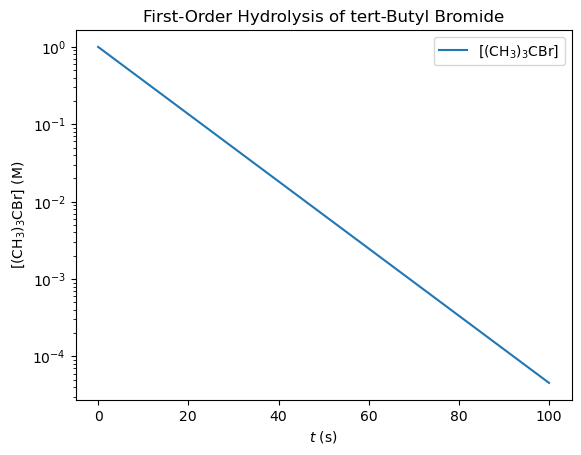

In [42]:
k = 0.1  # 速率常数，为简化计算设为0.1
c0 = 1.0 # 初始浓度，为简化计算设为1.0

t = np.linspace(0, 100, 200)
c = c0 * np.exp(-k * t)

plt.plot(t, c, label='$[\mathrm{(CH_3)_3CBr}]$')
plt.xlabel('$t$ (s)')
plt.ylabel('$[\mathrm{(CH_3)_3CBr}]$ (M)')
plt.title('First-Order Hydrolysis of tert-Butyl Bromide')
plt.yscale('log')  # y轴采用对数比例尺
plt.legend()
plt.show()

在后续的拟合与优化课程中，我们会接触到这类分析方法的更多应用场景。

### 网格线与坐标轴轴线
接下来，我们可以通过添加**网格线**让图像更易读。网格线会在绘图区域叠加水平和垂直的参考线，能帮助我们更精准地读取数值。在Matplotlib中，这一操作可通过 `plt.grid()` 函数实现。例如，我们可以用以下方式为 $\sin x$ 的图像添加网格线：
```python
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid()

plt.show()
```

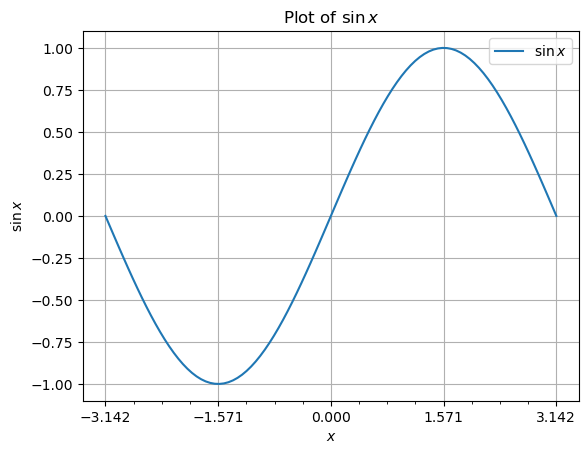

In [43]:
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid()

plt.show()

你觉得默认的网格线颜色和样式是什么样的？对我而言，这种实线网格线有点喧宾夺主。如果我们想修改它们，比如改成虚线，该怎么做呢？其实这很容易实现，只需使用 `plt.grid(linestyle='--')` 即可。
```python
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')

plt.show()
```

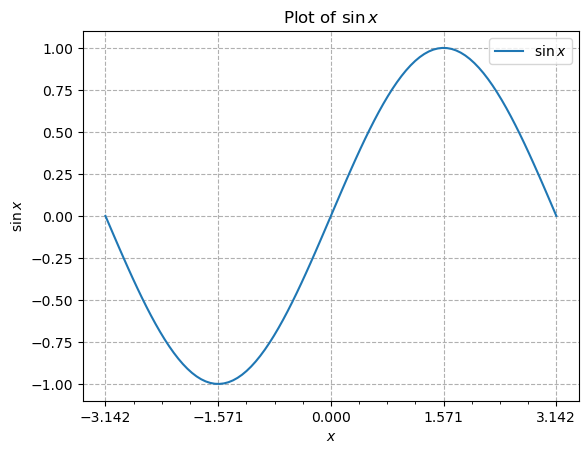

In [44]:
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')

plt.show()

到目前为止我们所学的所有相关功能（比如修改颜色、样式和线宽），都可以在 `plt.grid` 模块中实现。
```python
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle=':', color='#98caec', linewidth=1)

plt.show()
```

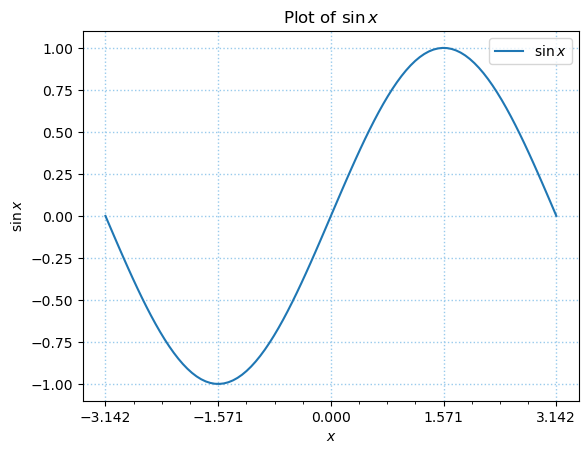

In [45]:
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle=':', color='#98caec', linewidth=1)

plt.show()

**坐标轴轴线** 是指标记绘图区域边界的线条（包括上、下、左、右四条）。默认情况下，这四条轴线均为可见状态，但我们可以调整它们的可见性、位置和样式，以提升图像的清晰度。调整轴线的方式稍有不同：你需要通过 `plt.gca().spines` 而非 `plt.spines` 来访问它们。例如，我们可以通过以下方式隐藏图像的顶部和右侧轴线：
```python
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
```

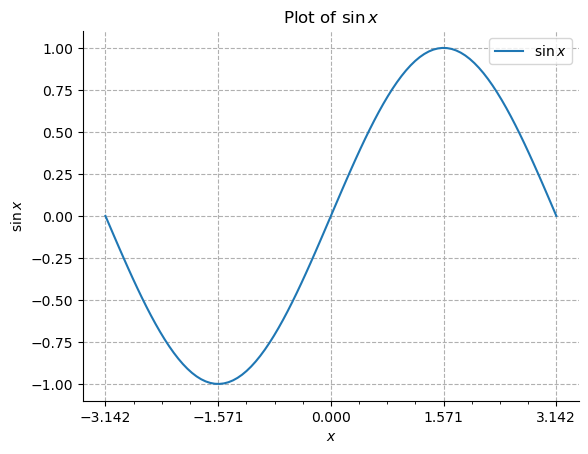

In [46]:
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

在上述示例中，我们通过 `set_visible()` 方法隐藏了图像的顶部和右侧轴线。轴线的其他可配置属性还包括 `set_color()`（设置颜色）、`set_linewidth()`（设置线宽）和 `set_linestyle()`（设置线型）。例如，我们可以通过以下方式将顶部轴线的颜色改为红色：
```python
plt.plot(x, y, label='$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')

# 调整坐标轴轴线的属性
plt.gca().spines['left'].set_position(('data', 0))   # 将y轴移至x=0的位置
plt.gca().spines['bottom'].set_position(('data', 0)) # 将x轴移至y=0的位置
plt.gca().spines['left'].set_color('blue')           # 修改颜色
plt.gca().spines['bottom'].set_linewidth(2)          # 调粗线条
plt.gca().spines['top'].set_visible(False)           # 隐藏顶部轴线
plt.gca().spines['right'].set_visible(False)         # 恢复右侧轴线显示

plt.show()
```

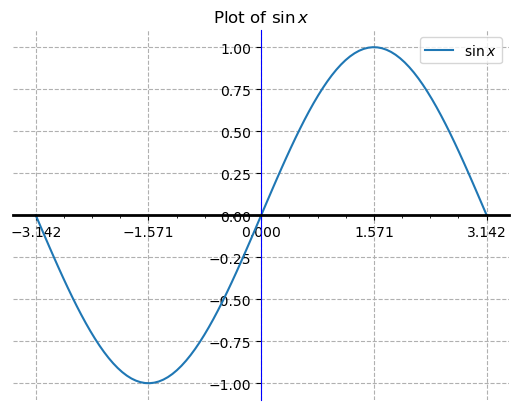

In [ ]:
plt.plot(x, y, label='$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')

# 调整坐标轴轴线的属性
plt.gca().spines['left'].set_position(('data', 0))   # 将y轴移至x=0的位置
plt.gca().spines['bottom'].set_position(('data', 0)) # 将x轴移至y=0的位置
plt.gca().spines['left'].set_color('blue')           # 修改颜色
plt.gca().spines['bottom'].set_linewidth(2)          # 调粗线条
plt.gca().spines['top'].set_visible(False)           # 隐藏顶部轴线
plt.gca().spines['right'].set_visible(False)         # 恢复右侧轴线显示

plt.show()

以下为控制坐标轴轴线的核心方法总结：

| 属性    | 方法 / 参数         | 描述                                                   |
|-------------|---------------------------|---------------------------------------------------------------|
| 可见性  | `spine.set_visible()`     | 显示 (`True`)或隐藏(`False`)轴线.                      |
| 位置    | `spine.set_position()`    | 控制轴线的位置(`'data'`, `'axes'`, `'outward'`). |
| 颜色       | `spine.set_color()`       | 设置轴线的颜色（e.g., 已命名的颜色或者十六进制色码）         |
| 线粗   | `spine.set_linewidth()`   | 以点为单位调整轴线的粗细                  |
| 线型   | `spine.set_linestyle()`   | 改变线型 (`'-'`, `'--'`, `':'`, `'-. '` etc.). |

### 其他图表设置

这里有一些对你有用的额外图表设置选项。要更改图表的整体尺寸，可使用 `plt.figure(figsize=(width, height))`。例如，下面的代码可以创建一个宽度为10英寸、高度为5英寸的图表：

```python
# set figure size to 10x5 inches
plt.figure(figsize=(10, 5))

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
```

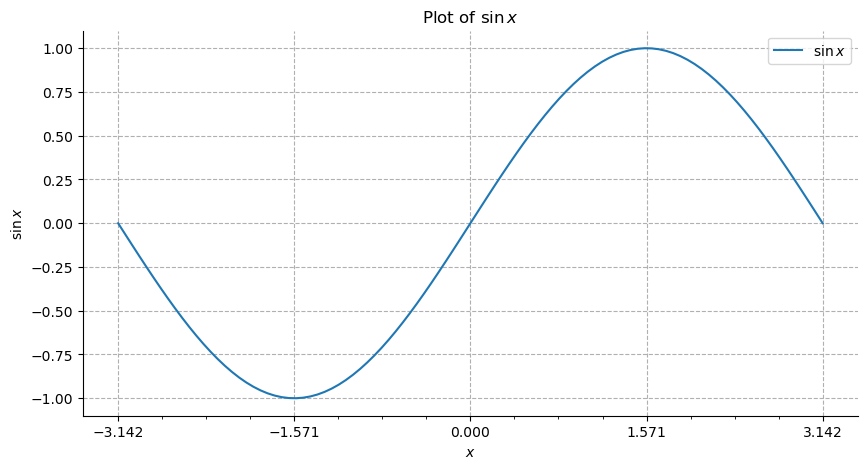

In [ ]:
# 设置图表尺寸为10x5英寸
plt.figure(figsize=(10, 5))

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

我们可以通过 `plt.figure()` 函数中的另一个参数 `dpi` 来控制图表的分辨率。例如，下面的代码会创建一个分辨率为每英寸 300 点的图表：
```python
#将图表分辨率设置为每英寸300点
plt.figure(figsize=(10, 5), dpi=300)

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
```

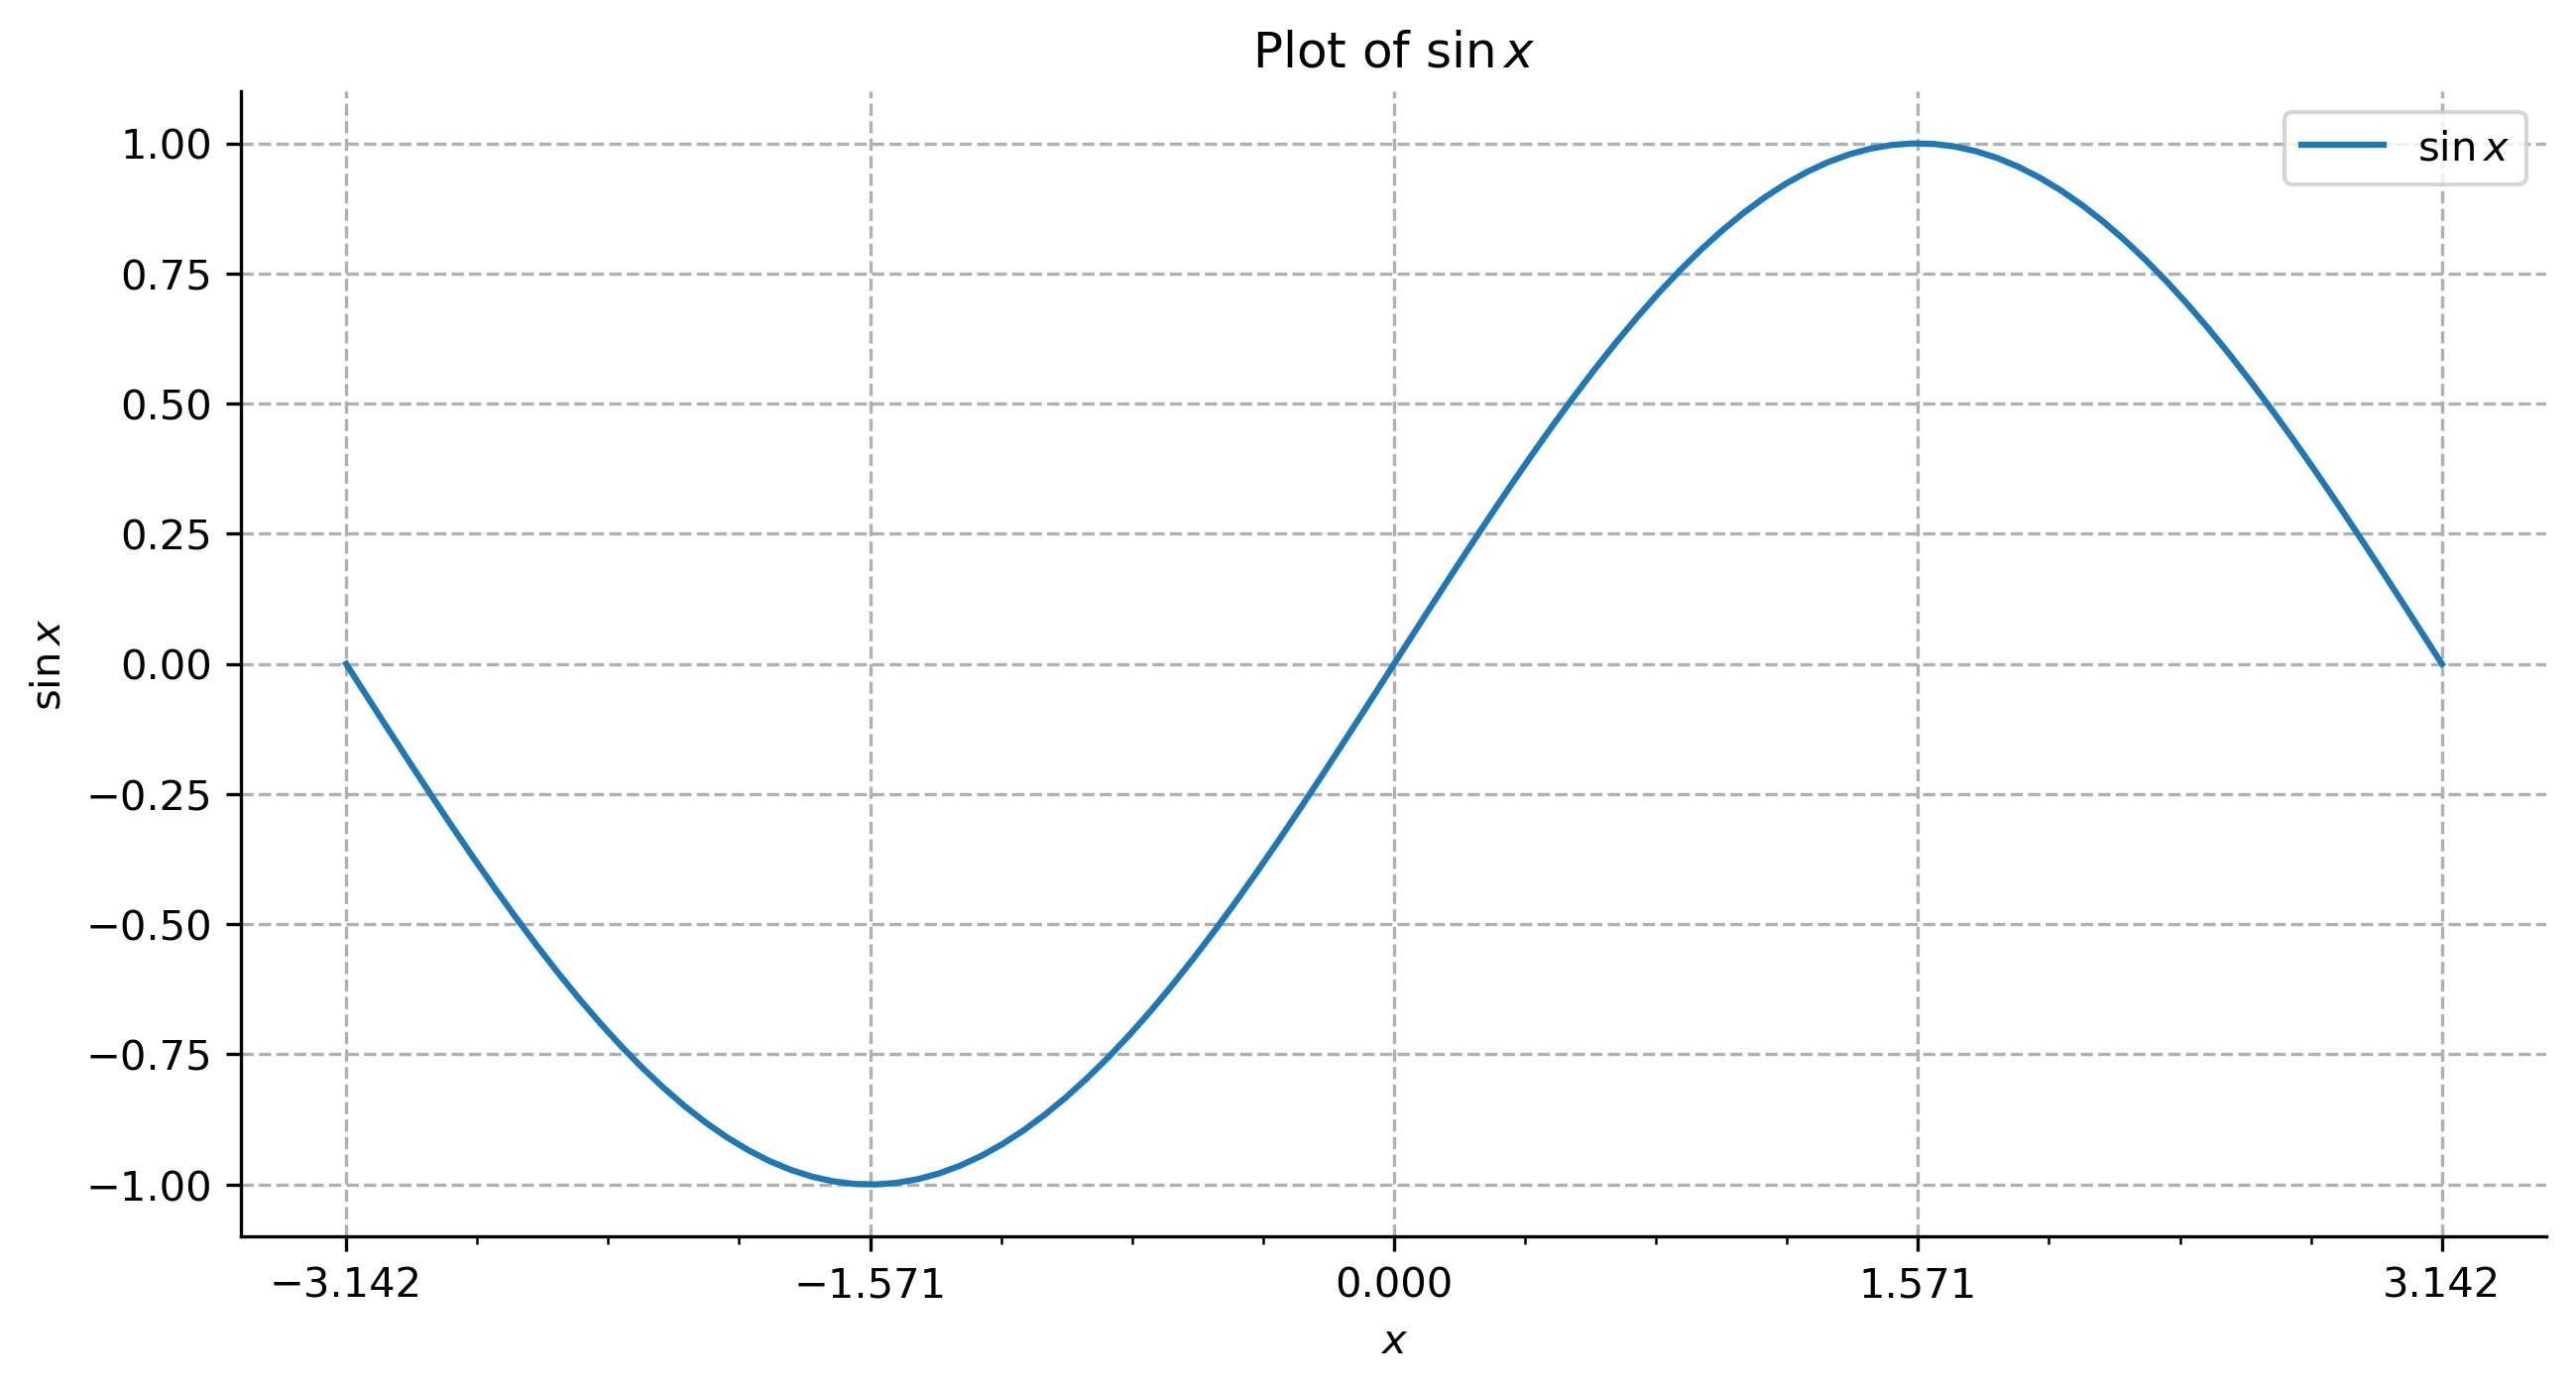

In [ ]:
#将图表分辨率设置为每英寸300点
plt.figure(figsize=(10, 5), dpi=300)

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

默认图表分辨率为每英寸 100 点（`dpi=100`）
我们也可以通过 `plt.figure()` 中的 `facecolor`（背景色）和 `edgecolor`（边框色）参数来调整图表的背景颜色和边框样式。例如，下方代码会创建一个带有“Yu蓝”背景和“Miku青”边框的图表：
```python
#将图表背景色改为Yu蓝，边框颜色改为Miku青
plt.figure(figsize=(10, 5), facecolor='#98caec', edgecolor='#39c5bb', linewidth=12)

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
```

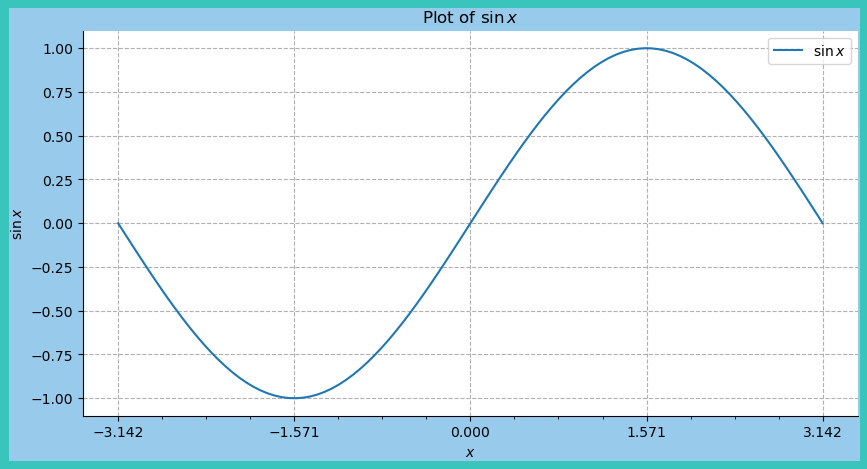

In [ ]:
#将图表背景色改为Yu蓝，边框颜色改为Miku青
plt.figure(figsize=(10, 5), facecolor='#98caec', edgecolor='#39c5bb', linewidth=12)

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

<span style="color:green">**练习**</span>：根据以下要求绘制一幅图表。

- 绘制格式规范的 $\cos{x}$ 函数图像，自变量范围为 $0$ 至 $4\pi$。
- 显示样式恰当的 $x$ 轴和 $y$ 轴，主刻度和次刻度需清晰标注出函数的零点、最小值点和最大值点。
- 显示图表标题、图例和网格线。
- 仅保留底部和左侧的坐标轴边框。
- 将图表尺寸设置为宽8英寸、高4英寸。

请用下面的代码为起点开始写：

```python
x4 = ...  #选择适当的范围和步长
y4 = np.cos(x4)
```

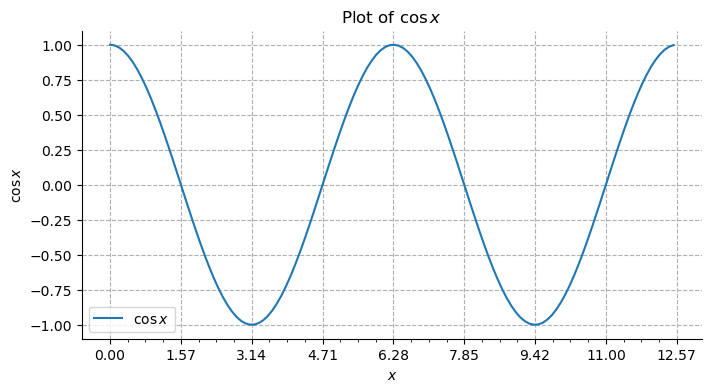

In [51]:
x4 = np.arange(0, 4*np.pi, 0.1)
y4 = np.cos(x4)

plt.figure(figsize=(8, 4))

plt.plot(x4, y4, label='$\cos x$')

plt.xlabel('$x$')
plt.ylabel('$\cos x$')

plt.title('Plot of $\cos x$')
plt.legend()

plt.xticks(np.arange(0, 4 * np.pi+0.1, np.pi/2))
plt.xticks(np.arange(0, 4 * np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

## 多图叠加
在单个图表中叠加多图其实非常简单。只需多次调用 `plt.plot()` 函数，就能得到包含多条曲线的图表。例如，下方代码可用于验证三角恒等式
$$\sec^2 x - \tan^2 x = 1$$

```python
x_mult = np.linspace(-2.5*np.pi+0.1, 2.5*np.pi-0.1, 500)
y_mult_1 = np.tan(x_mult) ** 2
y_mult_2 = np.cos(x_mult) ** -2 #由于 NumPy 本身不支持正割函数，我们改用余弦函数的倒数来实现
y_mult_3 = y_mult_2 - y_mult_1

plt.figure(figsize=(12, 5))
plt.plot(x_mult, y_mult_1, label=r'$\tan^2 x$')
plt.plot(x_mult, y_mult_2, label=r'$\sec^2 x$')
plt.plot(x_mult, y_mult_3, label=r'$\sec^2 x - \tan^2 x$', linestyle='--')

plt.title(r'Trigonometric Identity $\sec^2 x - \tan^2 x = 1$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-0.5, 4)

plt.xticks(np.arange(-2.5*np.pi, 2.5*np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-2.5*np.pi, 2.5*np.pi+0.1, np.pi/8), minor=True)
plt.grid(linestyle=':')

plt.show()
```

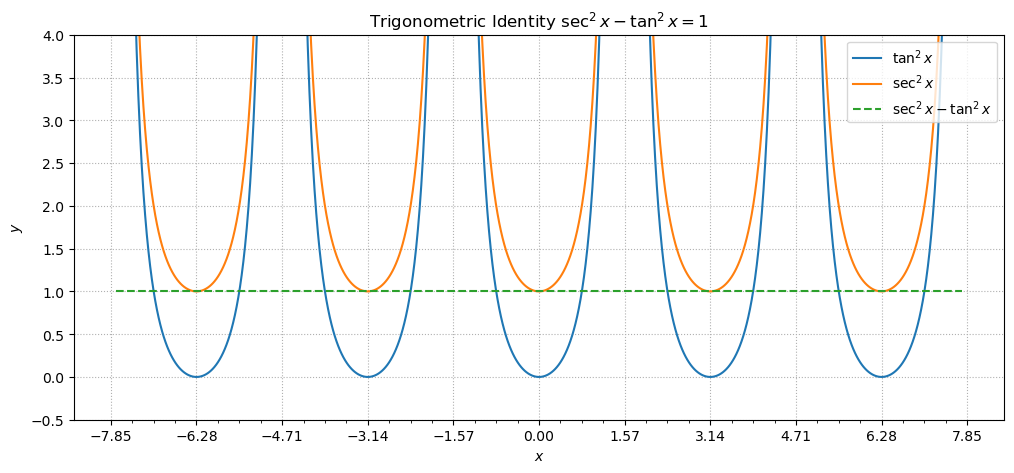

In [ ]:
x_mult = np.linspace(-2.5*np.pi+0.1, 2.5*np.pi-0.1, 500)
y_mult_1 = np.tan(x_mult) ** 2
y_mult_2 = np.cos(x_mult) ** -2  #由于 NumPy 本身不支持正割函数，我们改用余弦函数的倒数来实现
y_mult_3 = y_mult_2 - y_mult_1

plt.figure(figsize=(12, 5))
plt.plot(x_mult, y_mult_1, label=r'$\tan^2 x$')
plt.plot(x_mult, y_mult_2, label=r'$\sec^2 x$')
plt.plot(x_mult, y_mult_3, label=r'$\sec^2 x - \tan^2 x$', linestyle='--')

plt.title(r'Trigonometric Identity $\sec^2 x - \tan^2 x = 1$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-0.5, 4)

plt.xticks(np.arange(-2.5*np.pi, 2.5*np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-2.5*np.pi, 2.5*np.pi+0.1, np.pi/8), minor=True)
plt.grid(linestyle=':')

plt.show()

<span style="color:green">**练习**:</span> 现在该重新回顾我们的Morse势了！我们需要将Morse势与简谐势进行对比，并在同一个图表中绘制出这两种势能曲线。你需要先定义一个名为 `harmonic` 的函数，它接收 $r$、$r_0$ 和 $k$ 作为输入值，并返回该位置的简谐势数值。回顾一下，简谐势的表达式如下：
$$V_\text{harmonic}(r) = \frac{1}{2} k \left( r - r_0 \right)^2$$

在下方的代码框中定义函数 `harmonic(r, k, r0)`。

In [98]:
def harmonic(r, k, r0):
    return 0.5 * k * (r - r0) ** 2

在这里 $k$ 是弹性系数, 表达式如下
$$k = 2D_e a^2$$

在下方的代码框中定义`k`，以 $\mathrm{eV/Å^2}$ 为单位。

In [99]:
k = 2 * De * a**2

以下面的代码作为你的起点。你也可以参考在前面提到过的Morse势作图的代码。可以随便加一些特征来让你的图像可爱一些(´▽｀)

```python
r = np.linspace(0, r0 + 2.0, 500)  # Å
V_morse = ...  # Morse势
V_harmonic = ...  # 简谐势
```

**提示**：如何让这幅图恰当地体现出两种势能之间的对比？纵轴的上限应略高于 $D_e$，而下限则应……

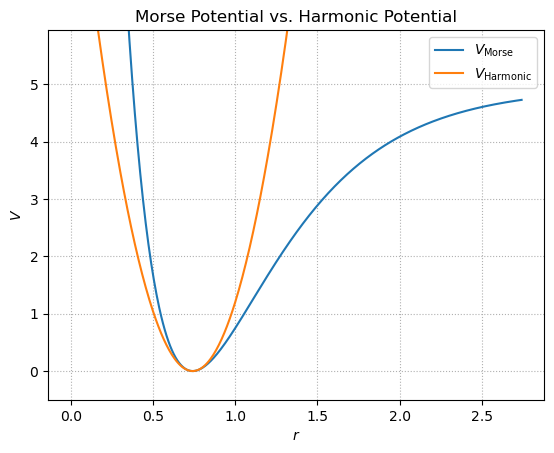

In [ ]:
r = np.linspace(0, r0 + 2.0, 500)  # Å
V_morse = morse(r, De, a, r0)  # Morse势
V_harmonic = harmonic(r, k, r0)  # 简谐势

plt.plot(r, V_morse, label=r'$V_\text{Morse}$')
plt.plot(r, V_harmonic, label=r'$V_\text{Harmonic}$')

plt.title(r'Morse Potential vs. Harmonic Potential')
plt.legend()

plt.xlabel('$r$')
plt.ylabel('$V$')
plt.ylim(-0.5, De+1)

plt.grid(linestyle=':')

plt.show()

<span style="color:green">**练习**:</span> 我们要验证朗伯-比尔定律（Beer–Lambert's law）。<u>别告诉我你不知道这个定律！</u>

<u>……好吧，你可能是真的不知道……</u>

<u>天啊……行吧行吧，我来告诉你……</u>

（*咳嗽*）朗伯-比尔定律描述了溶液中某物质的浓度与其吸光量之间的关系。简单来说，溶液浓度越高，光线穿过时被吸收的量就越多。这一原理在化学和生物学领域被广泛应用于通过分光光度法测定化合物浓度，是定量分析的基础工具。

从数学角度，该定律指出吸光度与吸光物质的浓度以及光线穿过溶液的光程长度均成正比，表达式为：
$$A = \varepsilon c l$$

其中：
- $A$ 为<u>吸光度</u>，是无量纲量——因为它是一个比值；
- $\varepsilon$ 为<u>摩尔吸光系数</u>（也称作摩尔消光系数），单位为 $\mathrm{L \cdot mol^{-1} \cdot cm^{-1}}$，表征该物质在特定波长下对光的吸收强度；
- $c$ 为吸光物质的<u>浓度</u>，通常单位为 $\mathrm{mol \cdot L^{-1}}$；
- $l$ 为光线穿过溶液的<u>光程长度</u>，通常指比色皿的宽度，单位为 $\mathrm{cm}$。

亚甲基蓝（methylene blue）在水中、665纳米（$665\,\mathrm{nm}$）波长下的摩尔吸光系数为 $6.71 \times 10^{4}\,\mathrm{L \cdot mol^{-1} \cdot cm^{-1}}$（数据来源：[_React. Chem. Eng._ **2020**, 5, 377–386](https://doi.org/10.1039/C9RE00456D)）。请在下方代码单元格中将 $\varepsilon$ 定义为变量 `eps`。
```python
eps = 6.71e4
```

In [101]:
eps = 6.71e4

绘制吸光度随浓度变化的标准曲线，浓度范围为 $0$ 至 $5 \times 10^{-5}\,\mathrm{M}$，曲线采用虚线样式。本练习全程假定光程长度 $l = 1\,\mathrm{cm}$。$x$ 轴主刻度需设置在 $1 \times 10^{-5}$、$2 \times 10^{-5}$、$3 \times 10^{-5}$、$4 \times 10^{-5}$、$5 \times 10^{-5}\,\mathrm{M}$ 处，同时合理添加次刻度。$y$ 轴则需添加能恰当表示 $0$ 至 $3.5$ 数值范围的次刻度。

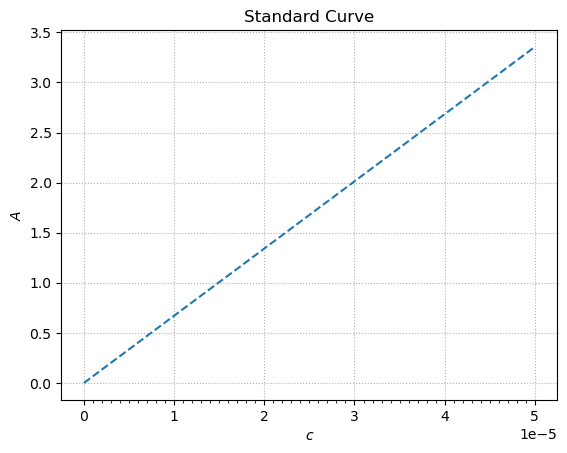

In [102]:
conc = np.linspace(0, 5.0e-5, 500)
absor = eps * conc

plt.figure()
plt.plot(conc, absor, linestyle='--')

plt.title(r'Standard Curve')

plt.xlabel('$c$')
plt.ylabel('$A$')

plt.grid(linestyle=':')
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-5))
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-6), minor=True)

plt.show()

<span style="color:#39c5bb">Yue 20 **Van Nya** "<u>**5min**</u>"</span> ~~正在路上!~~ 已从分光光度计获取了一组数据。该数据存储在一个数组中：

```python
data_conc = np.array([2.34, 4.69, 9.38, 18.76, 37.52]) * 1e-6
data_absor = np.array([114, 514, 810, 1919, 3810]) * 1e-3
```

将这些数据绘制成**散点图**，并与标准曲线一同展示。

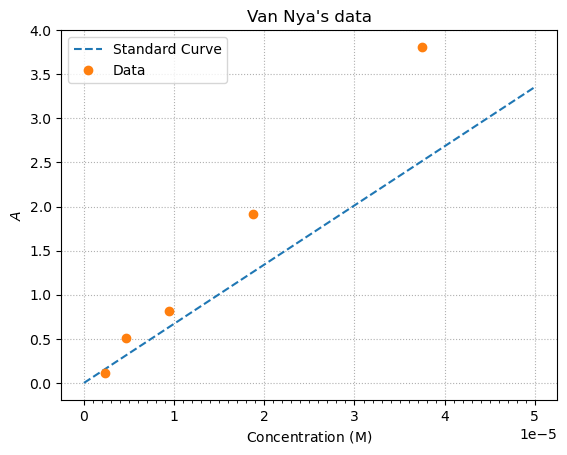

In [103]:
data_conc = np.array([2.34, 4.69, 9.38, 18.76, 37.52]) * 1e-6
data_absor = np.array([114, 514, 810, 1919, 3810]) * 1e-3

plt.plot(conc, absor, linestyle='--', label='Standard Curve')
plt.plot(data_conc, data_absor, marker='o', linestyle='', label='Data')

plt.title('Van Nya\'s data')
plt.legend()

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$A$')

plt.grid(linestyle=':')
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-5))
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-6), minor=True)

plt.show()

你觉得 Van Nya 的测量做得准确吗？~~要是不准确的话，尽管动手教训他一顿！o(｀ω´ )o~~

你可以通过绘制数据相对于标准曲线的残差图来检验测量的准确性，代码如下：
```python
plt.plot(data_conc, data_conc * eps - data_absor, linestyle='', marker='o', label='Residuals')
plt.hlines(0, -1e-5, 6e-5, colors='red', linestyles='--', label='Zero Error')  # This creates a horizontal line at y=0 from -1e-5 to 6e-5
# Similarly, you should expect a function `plt.vlines(x, ymin, ymax, ...)` to create a vertical line at x=x from ymin to ymax
# Although we don't need it here:)

plt.title('Residuals of Van Nya\'s data')
plt.legend()

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$\Delta A$')

plt.axis([0, 5e-5, -1.5, 1.5])

plt.grid(linestyle='--')

plt.xticks(...)  # You should know how to do this! Use the same ticks as before

plt.show()
```

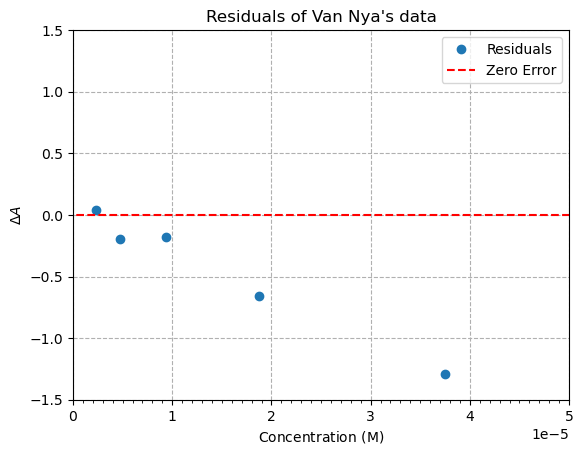

In [104]:
plt.plot(data_conc, data_conc * eps - data_absor, linestyle='', marker='o', label='Residuals')
plt.hlines(0, -1e-5, 6e-5, colors='red', linestyles='--', label='Zero Error')  # This creates a horizontal line at y=0 from -1e-5 to 6e-5
# Similarly, you should expect a function `plt.vlines(x, ymin, ymax, ...)` to create a vertical line at x=x from ymin to ymax
# Although we don't need it here:)

plt.title('Residuals of Van Nya\'s data')
plt.legend()

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$\Delta A$')

plt.axis([0, 5e-5, -1.5, 1.5])

plt.grid(linestyle='--')

plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-5))
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-6), minor=True)

plt.show()

你在残差中是否观察到了明显的规律？这说明数据存在系统误差。良好的测量结果，其残差应围绕零值随机分布。

另一名学生使用相同的样品溶液测得了一组相同的数据（因此你可以将`data_conc`用作横轴数据），测量结果存储在数组`data_absor_2`中。请将这组数据绘制成散点图，并与标准曲线一同展示。
```python
data_absor_2 = np.array([0.15, 0.35, 0.65, 1.25, 2.30])
```

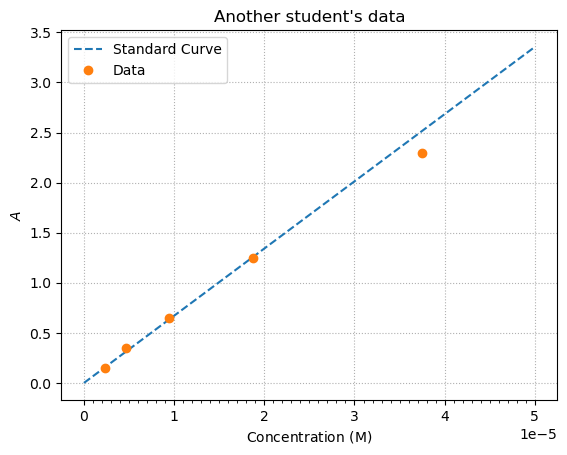

In [105]:
data_absor_2 = np.array([0.15, 0.35, 0.65, 1.25, 2.30])

plt.figure()
plt.plot(conc, absor, linestyle='--', label='Standard Curve')
plt.plot(data_conc, data_absor_2, linestyle='', marker='o', label='Data')

plt.title('Another student\'s data')
plt.legend()

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$A$')

plt.grid(linestyle=':')
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-5))
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-6), minor=True)

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$A$')

plt.show()

通过绘制残差图检验测量的准确性。

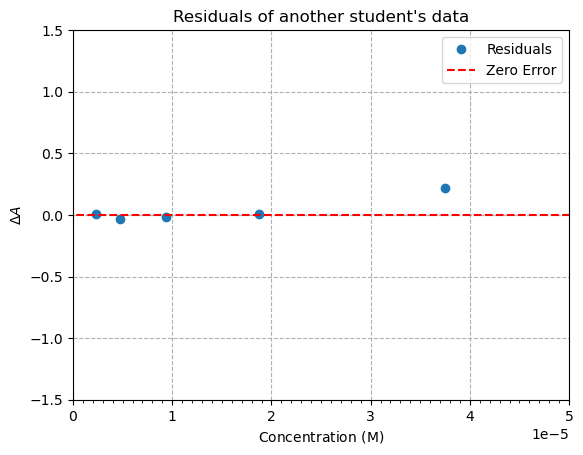

In [106]:
plt.plot(data_conc, data_conc * eps - data_absor_2, linestyle='', marker='o', label='Residuals')
plt.hlines(0, -1e-5, 6e-5, colors='red', linestyles='--', label='Zero Error')  # This creates a horizontal line at y=0 from -1e-5 to 6e-5
# Similarly, you should expect a function `plt.vlines(x, ymin, ymax, ...)` to create a vertical line at x=x from ymin to ymax
# Although we don't need it here:)

plt.title('Residuals of another student\'s data')
plt.legend()

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$\Delta A$')

plt.axis([0, 5e-5, -1.5, 1.5])

plt.grid(linestyle='--')

plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-5))
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-6), minor=True)

plt.show()

你可能会注意到，在浓度为 $3.752 \times 10^{-5}\,\mathrm{M}$ 时，吸光度与标准曲线存在轻微偏离。这是因为我们实际上已经达到了朗伯-比尔定律的**线性范围上限**（LoL），该上限对应的吸光度约为 $1$。超过此数值后，吸光度与浓度不再呈线性关系，而是会逐渐趋于平稳（<span style="color:green">这是为什么呢？</span>）。不过，除了这个异常点之外，其余数据点仍然与标准曲线贴合良好，这一点在残差图中也能得到体现——残差呈现出紧密且随机的分布状态。

## 单图中叠加多个子图

有时我们可能希望在单个图表中绘制多个**子图**。例如，我们可能想要绘制零级、一级和二级反应的浓度与时间的关系图，以便更好地进行对比。但这些图表使用的纵轴（$y$）刻度不同，因此无法将它们叠加在同一个图表中。要绘制多个子图，我们可以使用 `subplot` 函数。

首先，我们需要通过 `plt.figure()` 生成一个图表画布。然后，可使用 `plt.subplot(rows, columns, plot_number)` 来创建子图。第一个参数 `rows` 用于指定图表中的行数，第二个参数 `columns` 用于指定列数。第三个参数 `plot_number` 用于指定该子图在整体图表中的编号，**<u>编号从 `1` 开始</u>**。<u>编号顺序始终遵循从左到右、**再**从上到下的规则。</u>下面我们做一个简单的示例演示：

```python
A0 = 1.0          # 初始浓度 (M)
k0 = 0.02         # 零级速率常数 (M·s^-1)
k1 = 0.10         # 一级速率常数 (s^-1)
k2 = 0.20         # 二级速率常数 (M^-1·s^-1)
t  = np.linspace(0, 40, 100)  # 时间 (s)

A_zeroth = A0 - k0*t
A_first  = A0 * np.exp(-k1*t)
A_second = A0 / (1 + k2*A0*t)

plt.figure(figsize=(12, 4))

# 零级反应
plt.subplot(1, 3, 1)
plt.plot(t, A_zeroth, label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Zeroth Order: $[A] = [A]_0 - kt$')

# 一级反应
plt.subplot(1, 3, 2)
plt.plot(t, np.log(A_first), label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$\ln [A]$')
plt.title(r'First Order: $\ln [A] = \ln [A]_0 - kt$')

# 二级反应
plt.subplot(1, 3, 3)
plt.plot(t, 1/A_second, label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$1/[A]$ (M$^{-1}$)')
plt.title(r'Second Order: $1/[A] = 1/[A]_0 + kt$')

plt.tight_layout() # 该函数会自动调整子图之间的间距。绘制多个子图时，你应当使用这个函数！
plt.show()
```

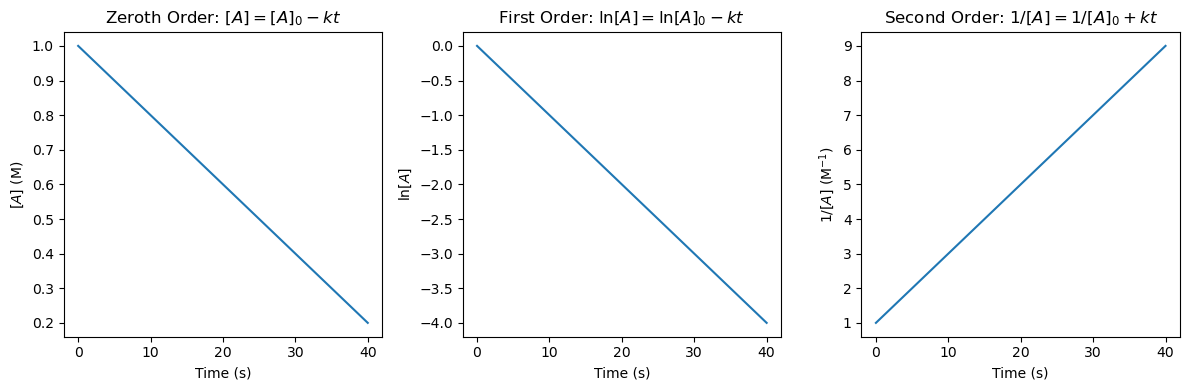

In [ ]:
A0 = 1.0          # 初始浓度 (M)
k0 = 0.02         # 零级速率常数 (M·s^-1)
k1 = 0.10         # 一级速率常数 (s^-1)
k2 = 0.20         # 二级速率常数 (M^-1·s^-1)
t  = np.linspace(0, 40, 100)  # 时间 (s)

A_zeroth = A0 - k0*t
A_first  = A0 * np.exp(-k1*t)
A_second = A0 / (1 + k2*A0*t)

plt.figure(figsize=(12, 4))

# 零级反应
plt.subplot(1, 3, 1)
plt.plot(t, A_zeroth, label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Zeroth Order: $[A] = [A]_0 - kt$')

# 一级反应
plt.subplot(1, 3, 2)
plt.plot(t, np.log(A_first), label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$\ln [A]$')
plt.title(r'First Order: $\ln [A] = \ln [A]_0 - kt$')

# 二级反应
plt.subplot(1, 3, 3)
plt.plot(t, 1/A_second, label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$1/[A]$ (M$^{-1}$)')
plt.title(r'Second Order: $1/[A] = 1/[A]_0 + kt$')

plt.tight_layout() # 该函数会自动调整子图之间的间距。绘制多个子图时，你应当使用这个函数！
plt.show()

如果你想对比一下修饰前和修饰后的一级和二级反应，该怎么做呢？我们可以在一张单图中绘制四个子图：

```python
plt.figure(figsize=(8, 8))

# 未修饰的一级反应
plt.subplot(2, 2, 1)
plt.plot(t, A_first)
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Non-modified First Order Kinetics')

# 未修饰的二级反应
plt.subplot(2, 2, 2)
plt.plot(t, A_second)
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Non-modified Second Order Kinetics')

# 修饰过的一级反应
plt.subplot(2, 2, 3)
plt.plot(t, np.log(A_first))
plt.xlabel('Time (s)')
plt.ylabel(r'$\ln [A]$ ($\ln \mathrm{M}$)')
plt.title('Modified First Order Kinetics')

# 修饰过的二级反应
plt.subplot(2, 2, 4)
plt.plot(t, 1/A_second)
plt.xlabel('Time (s)')
plt.ylabel(r'$1/[A]$ ($\mathrm{M}^{-1}$)')
plt.title('Modified Second Order Kinetics')

plt.tight_layout()
plt.show()
```

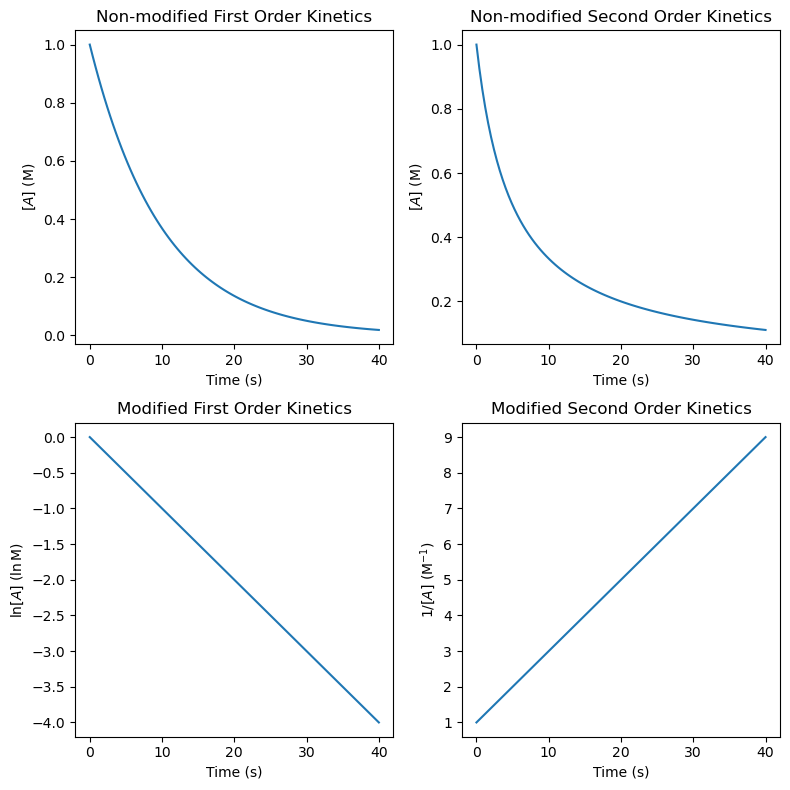

In [ ]:
plt.figure(figsize=(8, 8))


# 未修饰的一级反应
plt.subplot(2, 2, 1)
plt.plot(t, A_first)
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Non-modified First Order Kinetics')
# 未修饰的二级反应
plt.subplot(2, 2, 2)
plt.plot(t, A_second)
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Non-modified Second Order Kinetics')

# 修饰过的一级反应
plt.subplot(2, 2, 3)
plt.plot(t, np.log(A_first))
plt.xlabel('Time (s)')
plt.ylabel(r'$\ln [A]$ ($\ln \mathrm{M}$)')
plt.title('Modified First Order Kinetics')

# 修饰过的二级反应
plt.subplot(2, 2, 4)
plt.plot(t, 1/A_second)
plt.xlabel('Time (s)')
plt.ylabel(r'$1/[A]$ ($\mathrm{M}^{-1}$)')
plt.title('Modified Second Order Kinetics')

plt.tight_layout()
plt.show()

这是在一张图中使用多个子图的另一个示例。我们将绘制有机溶剂中10%乙酸溶液的红外光谱图（数据来源：[NIST Chemistry WebBook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C64197&Units=SI&Type=IR-SPEC&Index=2)）。本示例的目的是在图的上方展示完整光谱，在下方展示两个放大区域。需要注意的是，上方的子图横跨两列，而下方的两个子图各占一列。
```python
# 使用numpy加载数据，但跳过包含列名的表头行
data = np.loadtxt('./assets/acetic_acid.txt', skiprows=1)

# 第一列=波长，后五列=试验组
wavenumber = data[:, 0]
trials = data[:, 1:6]
# 上述代码用于从文件中加载数据——我们稍后再对其进行介绍

# 对五个试验组取平均值
avg = np.mean(trials, axis=1)

plt.figure(figsize=(12, 8))

# 上方：完整光谱
plt.subplot(2, 2, (1, 2))
plt.plot(wavenumber, avg, color='black')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('Full IR Spectrum of Acetic Acid')
plt.gca().invert_xaxis()  # 常规红外光谱作图法（波数由高到低）
plt.grid(linestyle=':')

# 左下方：O–H伸缩振动区（3600–2200 cm⁻¹）
plt.subplot(2, 2, 3)
plt.plot(wavenumber, avg, color='blue')
plt.xlim(3600, 2200)  # 无需反转坐标轴，因为我们已经设置了反向的x轴范围
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('O–H Stretching Region (3600–2200 cm$^{-1}$)')
plt.grid(linestyle=':')

# 右下方：C=O伸缩振动区（1900–1500 cm⁻¹）
plt.subplot(2, 2, 4)
plt.plot(wavenumber, avg, color='red')
plt.xlim(1900, 1500)  # 无需反转坐标轴，因为我们已经设置了反向的x轴范围
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('C=O Stretching Region (1900–1500 cm$^{-1}$)')
plt.grid(linestyle=':')

plt.tight_layout()
plt.show()
```

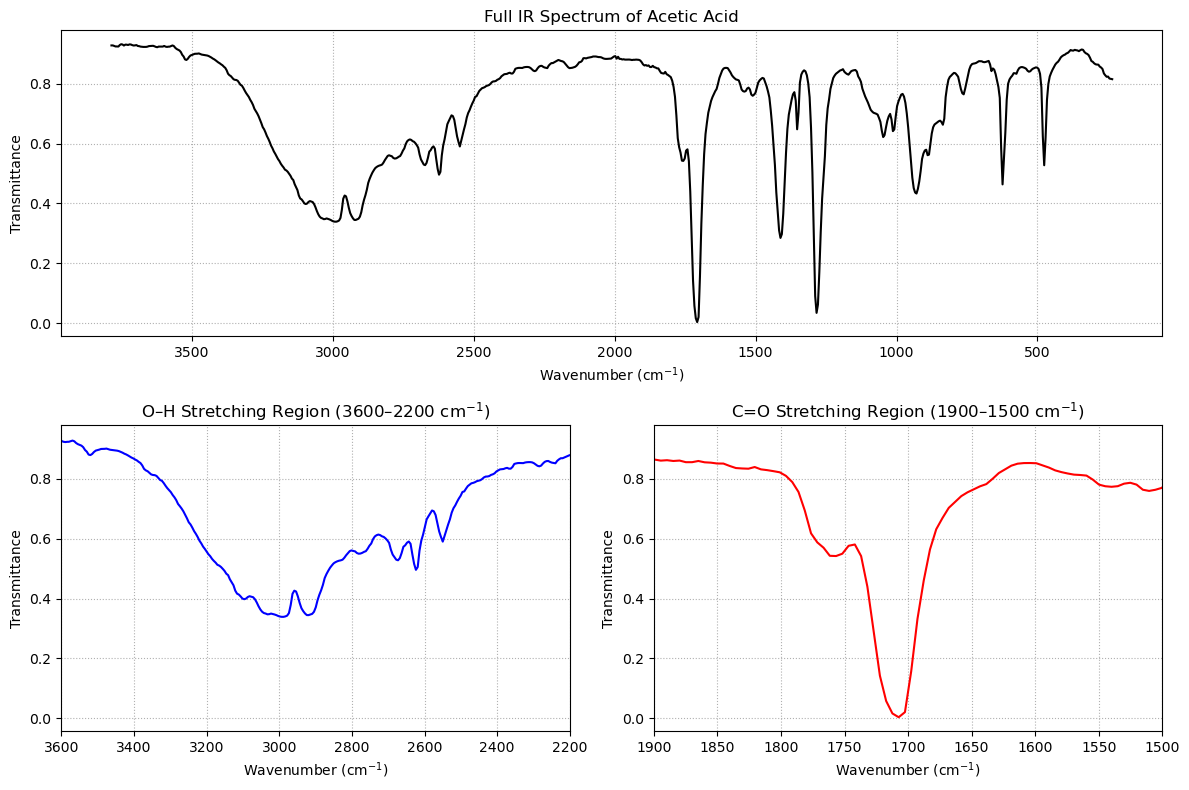

In [ ]:
# # 使用numpy加载数据，但跳过包含列名的表头行
data = np.loadtxt('./assets/acetic_acid.txt', skiprows=1)

# 第一列=波长，后五列=试验组
wavenumber = data[:, 0]
trials = data[:, 1:6]
# 上述代码用于从文件中加载数据——我们稍后再对其进行介绍

# 对五个试验组取平均值
avg = np.mean(trials, axis=1)

plt.figure(figsize=(12, 8))

# 上方：完整光谱
plt.subplot(2, 2, (1, 2))
plt.plot(wavenumber, avg, color='black')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('Full IR Spectrum of Acetic Acid')
plt.gca().invert_xaxis()  # 常规红外光谱作图法（波数由高到低）
plt.grid(linestyle=':')

# 左下方：O–H伸缩振动区（3600–2200 cm⁻¹）
plt.subplot(2, 2, 3)
plt.plot(wavenumber, avg, color='blue')
plt.xlim(3600, 2200)  # 无需反转坐标轴，因为我们已经设置了反向的x轴范围
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('O–H Stretching Region (3600–2200 cm$^{-1}$)')
plt.grid(linestyle=':')

# 右下方：C=O伸缩振动区（1900–1500 cm⁻¹）
plt.subplot(2, 2, 4)
plt.plot(wavenumber, avg, color='red')
plt.xlim(1900, 1500)  # 无需反转坐标轴，因为我们已经设置了反向的x轴范围
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('C=O Stretching Region (1900–1500 cm$^{-1}$)')
plt.grid(linestyle=':')

plt.tight_layout()
plt.show()

## 生成输出

终于！终终终终于！这是本节课的最后一部分内容（不过你还有一道课后习题要做哦~）。绘制完图表后，最后一步就是将其保存下来。这可以通过调用 `savefig` 函数实现。该函数的第一个参数为文件路径，你还可以自定义文件格式、透明度、分辨率等各项参数。具体来说：
```python
my_x = np.linspace(0, 10, 100)
my_y = my_x ** 2

fig = plt.figure(figsize=(5, 4))  # 在这里我们将整张图表赋值给一个变量，供后续调用

plt.plot(my_x, my_y)
plt.title('A Naïve Quadratic Function')
plt.xlabel('$x$')
plt.ylabel('$y = x^2$')

plt.savefig('./output/Naïve.png', transparent=True, format='png', dpi=300)
```

FileNotFoundError: [Errno 2] No such file or directory: './output/Naïve.png'

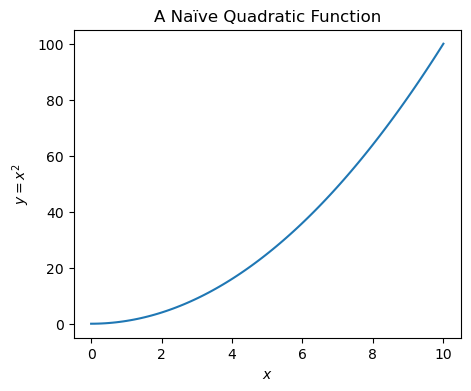

In [ ]:
my_x = np.linspace(0, 10, 100)
my_y = my_x ** 2

fig = plt.figure(figsize=(5, 4))  # 在这里我们将整张图表赋值给一个变量，供后续调用

plt.plot(my_x, my_y)
plt.title('A Naïve Quadratic Function')
plt.xlabel('$x$')
plt.ylabel('$y = x^2$')

plt.savefig('./output/Naïve.png', transparent=True, format='png', dpi=300)

你可以使用多种文件格式，包括 **.png**、**.jpg**、**.pdf**、**.svg** 和 **.eps**。尝试输出一个 PDF 文件：
```python
fig.savefig('./output/Naïve2.pdf', transparent=True, format='pdf')
```

In [ ]:
fig.savefig('./output/Naïve2.pdf', transparent=True, format='pdf')

看到了吗？如果我们想要将一张图表保存为多个文件，可以先把整张图表赋值给一个变量（例如 `fig`），然后多次调用 `fig.savefig()` 函数。

## 课后习题：Arrhenius动力学
在本习题中，你需要运用本节课所学的知识点，设计一张清晰规范、达到学术发表水准的图表。<u>**请注意：本题中使用的单位可能不一致——你需要对其进行相应调整！**</u>

你需要模拟一个化学反应并测试其动力学参数，以求得反应的活化能。

### 步骤1：生成数据
首先生成温度数据：创建取值范围为 $260–560\,\mathrm{K}$ 的温度数组 $T$（共25个数据点，存储在名为 `temp` 的变量中）。设定指前因子 $A = 2.0\times10^{12}\ \mathrm{s^{-1}}$，活化能 $E_a = 48.0\ \mathrm{kJ\,mol^{-1}}$。结合气体常数 $R = 8.314\ \mathrm{J\,mol^{-1}\,K^{-1}}$，根据以下公式计算速率常数：
$$k(T) = A\,\exp\!\left(-\frac{E_a}{RT}\right)$$

### 步骤2：添加随机噪声
使用以下代码为 $k$ 的数据添加随机噪声：
```python
np.random.seed(114514)# 固定随机种子以保证结果可复现
noise = np.random.uniform(-0.25, 0.25, size=temp.shape)
```
变量 `noise` 是一个与 `temp` 维度相同的随机数组，包含一系列噪声值。你需要将这些噪声值加到原始的 $k$ 数据上，得到添加噪声后的修正版 $k$ 数据。

创建一个1行2列的图表。在左侧子图中，绘制$k$ 随 $T$ 变化的曲线，其中$y$轴采用对数刻度。<u>该子图需绘制为散点图</u>。添加坐标轴标签、简洁的标题和点状网格线。$T$轴的主刻度每隔$50\,\mathrm{K}$设置一个，主刻度之间添加次刻度。将图例放置在不遮挡数据的角落位置。隐藏图表顶部和右侧的轴线，适当加粗左侧和底部的轴线，并保证刻度标签清晰可读。

在右侧子图中，绘制$\ln k$ 随 $1000/T$ 变化的曲线，<u>同样为散点图</u>。此处需对数据进行线性化处理，依据公式：
$$\ln k = - \frac{E_a}{RT} + \ln A$$
设置覆盖$1000/T$全范围且易读的$x$轴刻度并添加轴标签，同时添加点状网格线。轴线样式设置与左侧子图保持一致。

从$\ln k$ 对 $1000/T$ 的散点图中选取两个明显分离的点$(x_1, y_1)$和$(x_2, y_2)$（其中$x = 1000/T$，$y = \ln k$）。计算斜率$m = \frac{y_2 - y_1}{x_2 - x_1}$，并通过公式$E_a \approx -mR \times 1000$将其转换为活化能（系数1000是因使用了$1000/T$的单位换算）。活化能的结果以$\mathrm{kJ\,mol^{-1}}$为单位呈现。在图表下方通过`print()`函数输出你选取的两个点坐标以及估算得到的活化能值。在这两个选定点之间绘制一条虚线以展示数据趋势（注意：这并非回归分析，仅为简单的连线）。

在左侧的$k$-$T$半对数坐标图中，用辨识度高的标记突出显示最低温度对应的那个数据点。

确保图表整体视觉平衡：坐标轴标签字体统一、线条宽度匹配、网格线不突兀等。调用`plt.tight_layout()`优化布局，并将图表分别保存为300 dpi的透明PNG格式文件和PDF格式文件。用一句话说明，对于这类图表，你会在何种情况下优先选择PNG格式，何种情况下优先选择PDF格式。

> <span style="color:#98caec">_本题包含多项任务，你可能需要添加更多代码单元格——不必慌张！尝试将任务拆解为小模块，逐一解决即可~_</span>

FileNotFoundError: [Errno 2] No such file or directory: './output/arrhenius_semilog_and_linearized.pdf'

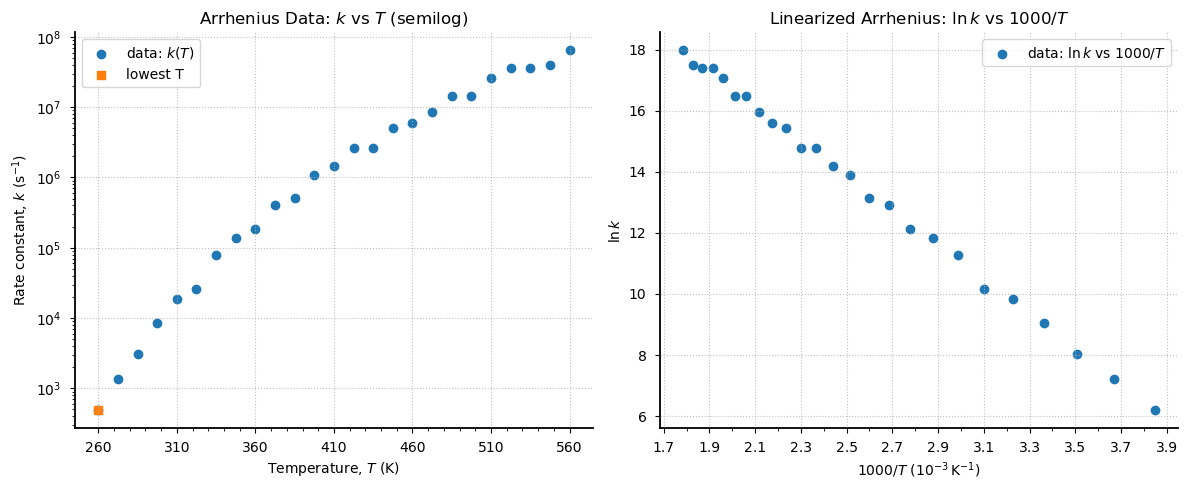

In [ ]:
# ----------------------------
# 1) 生成可复现的动力学数据
# ----------------------------
# 温度 (K): 25个点从260到560
temp = np.linspace(260.0, 560.0, 25)

A = 2.0e12                           # s^-1
Ea_kJmol = 48.0                      # kJ/mol
Ea = Ea_kJmol * 1e3                  # 将单位转换为J/mol来保持与R*T一致
R = 8.314                            # J/(mol·K)

k_true = A * np.exp(-Ea / (R * temp))

# 添加±25%的有界均匀分布噪声，并确保数据为正值
np.random.seed(114514)
noise = np.random.uniform(-0.25, 0.25, size=temp.shape)
k_noisy = k_true * (1.0 + noise)
#k_noisy = np.clip(k_noisy, 1e-300, None)  # 避免后续计算中出现log(0)的情况

# 预先计算右侧子图所需数据
x_lin = 1000.0 / temp              # 单位：10^-3 K^-1
y_lin = np.log(k_noisy)

# 选取两个距离足够远的点，用于手动计算斜率
i1, i2 = 0, -1
x1, y1 = x_lin[i1], y_lin[i1]
x2, y2 = x_lin[i2], y_lin[i2]
m = (y2 - y1) / (x2 - x1)         # ln(k)对1000/T作图所得曲线的斜率
Ea_est_Jmol = -m * R * 1000.0      # 系数1000的由来是横坐标x的取值为1000/T
Ea_est_kJmol = Ea_est_Jmol / 1000.0

# ----------------------------
# 2) 构建1x2图表
# ----------------------------
plt.figure(figsize=(12, 5))

# ----- 左侧：k对T作图（y轴为半对数坐标），散点图 -----
plt.subplot(1, 2, 1)
plt.scatter(temp, k_noisy, label=r"data: $k(T)$")
plt.yscale("log")
plt.xlabel(r"Temperature, $T$ (K)")
plt.ylabel(r"Rate constant, $k$ (s$^{-1}$)")
plt.title(r"Arrhenius Data: $k$ vs $T$ (semilog)")
# 网格线与刻度
plt.grid(True, linestyle=":", alpha=0.8)
plt.xticks(np.arange(260, 561, 50.0))               # 主刻度每隔50K设置一个
plt.xticks(np.arange(260, 561, 10.0), minor=True)   # 主刻度之间设置次刻度
# 轴线
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_linewidth(1.3)
plt.gca().spines["bottom"].set_linewidth(1.3)
plt.tick_params(axis="both", which="major", pad=6)

# 高亮并标注最低温度对应的点
plt.scatter(temp[0], k_noisy[0], marker="s", label="lowest T")
# plt.annotate(
#     fr"$T={temp[0]:.0f}\,\mathrm{{K}}$\n$k={k_noisy[0]:.2e}\,\mathrm{{s^{{-1}}}}$",
#     xy=(temp[0], k_noisy[0]),
#     xytext=(temp[0] + 12, k_noisy[0]*1.7),
#     arrowprops=dict(arrowstyle="->", lw=1),
# )

plt.legend(loc="best")

# ----- 右侧：ln(k) vs 1000/T, 散点图（线性化） -----
plt.subplot(1, 2, 2)
plt.scatter(x_lin, y_lin, label=r"data: $\ln k$ vs $1000/T$")
plt.xlabel(r"$1000/T$ ($10^{-3}\,\mathrm{K^{-1}}$)")
plt.ylabel(r"$\ln k$")
plt.title(r"Linearized Arrhenius: $\ln k$ vs $1000/T$")
# 网格线与刻度
plt.grid(True, linestyle=":", alpha=0.8)
# 基于观测数据的取值范围，设置易读的刻度
x_min, x_max = float(np.min(x_lin)), float(np.max(x_lin))
# 向外取整至一位小数，使刻度标记更规整
left_tick = np.floor(10*x_min)/10.0
right_tick = np.ceil(10*x_max)/10.0
plt.xticks(np.arange(left_tick, right_tick + 0.1, 0.2))
plt.xticks(np.arange(left_tick, right_tick + 0.05, 0.1), minor=True)
# 轴线
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_linewidth(1.3)
plt.gca().spines["bottom"].set_linewidth(1.3)
plt.tick_params(axis="both", which="major", pad=6)

# # 标注所选的两个点以及估算得到的活化能$E_a$（不绘制回归线）
# txt = (
#     fr"Points: $(x_1,y_1)=({x1:.2f},{y1:.2f}),$ "
#     fr"$(x_2,y_2)=({x2:.2f},{y2:.2f})$" "\n"
#     fr"$m=\frac{{\Delta y}}{{\Delta x}}={m:.3f}$"
#     "\n"
#     fr"$\hat{{E}}_a=-m R \times 1000={Ea_est_kJmol:.2f}\ \mathrm{{kJ\,mol^{{-1}}}}$"
# )
# # 将文本框放置在子图的左上方位置
# x_box = left_tick + 0.1
# y_box = np.max(y_lin) - 0.2*(np.max(y_lin)-np.min(y_lin))
# plt.text(x_box, y_box, txt, fontsize=9,
#          bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.3"))

plt.legend(loc="best")

# 布局与导出
plt.tight_layout()

plt.savefig("./output/arrhenius_semilog_and_linearized.pdf")
plt.savefig("./output/arrhenius_semilog_and_linearized.png", dpi=300, transparent=True)

# 一句话备注：
print("Prefer PNG for slides/quick previews and raster workflows; prefer PDF for vector-quality print/publication and infinite zoom without pixelation.")

**致谢**

本节课内容借鉴自以下资源：

- [Matplotlib Official Website](https://matplotlib.org)
- Charles J. Weiss's [Scientific Computing for Chemists with Python](https://weisscharlesj.github.io/SciCompforChemists/notebooks/introduction/intro.html)
- [An Introduction to Python for Chemistry](https://pythoninchemistry.org/intro_python_chemists/intro.html)
- 用于生成段落与代码的生成式人工智能(・ω< )★
- 以及众多来自Reddit,StackExchange等平台的资源！